In [1]:
import re
import moval
import itertools
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Let's check the model parameters first (pickle)

In [2]:
# pickle_path_org = 'Prostate_segmentation_auc_moval-ensemble-seg3d-auc_estim_algorithm_ts-model_mode_segmentation_confidence_scores_max_class_probability-conf_class_specific_True.pkl'
# pickle_path_cs = 'Prostate_segmentation_auc_max_class_probability-conf_ts-model_True.pkl'
#
# pickle_path_org = 'Prostate_segmentation_auc_moval-ensemble-seg3d-auc_estim_algorithm_ts-model_mode_segmentation_confidence_scores_max_class_probability-conf_class_specific_False.pkl'
# pickle_path_cs = 'Prostate_segmentation_auc_max_class_probability-conf_ts-model_False.pkl'
#
pickle_path_org = 'Brainlesionlas_segmentation_precision_moval-ensemble-seg3d-precision_estim_algorithm_ts-model_mode_segmentation_confidence_scores_max_class_probability-conf_class_specific_True.pkl'
pickle_path_cs = 'Brainlesionlas_segmentation_precision_max_class_probability-conf_ts-model_True.pkl'

In [3]:
with open(pickle_path_org, 'rb') as file:
    ckpt = pickle.load(file)
org_param = ckpt["param"]
print(org_param)
print(ckpt["fitted_perf"])

[1.00000000e+00 3.48823564e+06]
[array([0.99982095, 0.87559755]), array([0.99978895, 0.87470956]), array([0.99839061, 0.73764216]), array([0.99693073, 0.84529312]), array([0.99947557, 0.91788976]), array([0.99886106, 0.89076305]), array([0.99174003, 0.81533445]), array([0.99998219, 0.85175822]), array([0.99815454, 0.85762499])]


In [4]:
with open(pickle_path_cs, 'rb') as file:
    loaded_ckpt = pickle.load(file)
org_param = loaded_ckpt["param"]
print(org_param)
print(loaded_ckpt["fitted_perf"])

[1.00000000e+00 3.48823564e+06]
[array([0.99982095, 0.87559755]), array([0.99978895, 0.87470956]), array([0.99839061, 0.73764216]), array([0.99693073, 0.84529312]), array([0.99947557, 0.91788976]), array([0.99886106, 0.89076305]), array([0.99174003, 0.81533445]), array([0.99998219, 0.85175822]), array([0.99815454, 0.85762499])]


In [5]:
ckpt["fitted_perf"] = loaded_ckpt["fitted_perf"]
ckpt["param"] = loaded_ckpt["param"]

In [6]:
with open(pickle_path_org, 'wb') as file:
    pickle.dump(ckpt, file)

In [7]:
pickle_path_org = 'CIFAR100_classification_accuracy_max_class_probability-conf_ts-model_False.pkl'
pickle_path_cs = 'CIFAR100_classification_accuracy_max_class_probability-conf_ts-model_True.pkl'

In [8]:
with open(pickle_path_org, 'rb') as file:
    loaded_ckpt = pickle.load(file)
org_param = loaded_ckpt["param"]

[2.82976789]
2.239786140078738


(0.0, 100.0, 0.0, 10.0)

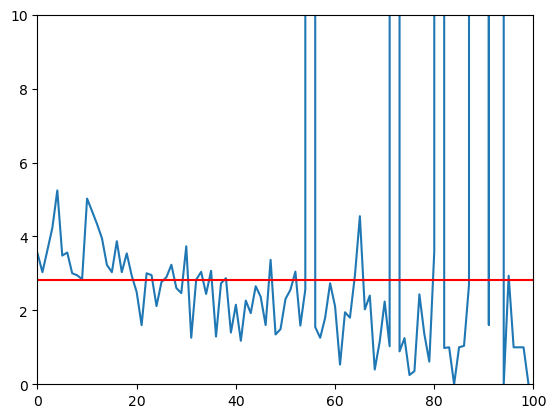

In [9]:
with open(pickle_path_cs, 'rb') as file:
    loaded_ckpt = pickle.load(file)
plt.plot(loaded_ckpt["param"])
print(org_param)
print(np.mean(loaded_ckpt["param"][loaded_ckpt["param"]<5]))
plt.axhline(y=org_param, xmin=0.0, xmax=100, color='r')
plt.axis((0, 100, 0, 10))

In [10]:
np.where(loaded_ckpt["param"]> 100)

(array([55, 72, 81, 88, 89, 90, 92, 93]),)

# CIFAR10

## Section 1: Table 1

In [11]:
test_syn_conds = ['gaussian_blur', 'motion_blur', 'snow', 'contrast', 'jpeg_compression', 'shot_noise', 'saturate',
                  'impulse_noise', 'pixelate', 'speckle_noise', 'frost', 'defocus_blur', 'brightness',
                  'gaussian_noise', 'zoom_blur', 'fog', 'spatter', 'glass_blur', 'elastic_transform']

### Section 1.1 CIFAR10, Synthetic, Accuracy

In [12]:
# I need to derive two metrics, of shape (36 x 95) and (36 x 95)

In [13]:
# estim_row_index
estim_rows = [2 + i * 4 for i in range(36)]
# real_row_index
real_rows = [3 + i * 4 for i in range(36)]

In [14]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_accuracy_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(estim_res[1].to_numpy()))
        results_conds.append(float(estim_res[2].to_numpy()))
        results_conds.append(float(estim_res[3].to_numpy()))
        results_conds.append(float(str(estim_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(real_res[1].to_numpy()))
        results_conds.append(float(real_res[2].to_numpy()))
        results_conds.append(float(real_res[3].to_numpy()))
        results_conds.append(float(str(real_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 36)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 36)).T

In [15]:
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [16]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{32.6}{6.2} & \ms{29.4}{5.2} & \ms{30.5}{6.1} & \ms{36.3}{6.5}
\ms{6.5}{5.0} & \ms{13.5}{6.7} & \ms{5.5}{5.0} & \ms{4.9}{4.0} & \ms{7.1}{5.4} & \ms{12.4}{7.6} & \ms{5.9}{4.9} & \ms{4.0}{3.7}
\ms{11.7}{6.2} & \ms{8.5}{5.3} & \ms{10.9}{6.1} & \ms{12.6}{6.5} & \ms{10.9}{6.5} & \ms{8.5}{5.9} & \ms{10.3}{6.1} & \ms{11.6}{6.7}
\ms{4.1}{3.7} & \ms{6.2}{3.7} & \ms{4.2}{3.7} & \ms{4.1}{3.7} & \ms{3.5}{3.5} & \ms{3.2}{1.8} & \ms{3.3}{3.2} & \ms{3.4}{3.4}
\ms{5.0}{5.0} & \ms{6.7}{3.7} & \ms{5.4}{3.1} & \ms{5.3}{2.9} & \ms{2.8}{2.7} & \ms{3.6}{2.2} & \ms{2.8}{2.4} & \ms{3.0}{2.4}


In [53]:
cifar10_acc_res = estim_res_all
cifar10_acc_gt = real_res_all

In [64]:
# imbalanced validation

In [65]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_accuracy_{test_syn_cond}_imb_val.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(estim_res[1].to_numpy()))
        results_conds.append(float(estim_res[2].to_numpy()))
        results_conds.append(float(estim_res[3].to_numpy()))
        results_conds.append(float(str(estim_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(real_res[1].to_numpy()))
        results_conds.append(float(real_res[2].to_numpy()))
        results_conds.append(float(real_res[3].to_numpy()))
        results_conds.append(float(str(real_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 36)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 36)).T

In [66]:
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [67]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{49.9}{9.3} & \ms{12.7}{7.2} & \ms{47.4}{9.3} & \ms{54.1}{9.6}
\ms{21.6}{8.3} & \ms{32.7}{9.1} & \ms{20.1}{8.3} & \ms{16.6}{8.7} & \ms{24.7}{4.7} & \ms{33.0}{6.3} & \ms{22.3}{4.1} & \ms{17.8}{3.4}
\ms{29.0}{9.3} & \ms{25.7}{8.0} & \ms{27.9}{9.3} & \ms{30.4}{9.6} & \ms{30.4}{5.6} & \ms{26.7}{5.0} & \ms{29.3}{5.4} & \ms{31.5}{5.8}
\ms{15.5}{8.6} & \ms{12.3}{7.0} & \ms{15.2}{8.7} & \ms{15.6}{8.6} & \ms{15.2}{4.2} & \ms{11.9}{3.4} & \ms{14.3}{4.0} & \ms{14.8}{4.1}
\ms{13.2}{8.3} & \ms{12.0}{6.6} & \ms{12.4}{7.7} & \ms{12.5}{7.8} & \ms{13.6}{3.4} & \ms{11.9}{4.2} & \ms{13.5}{3.0} & \ms{13.3}{3.1}


### Ensemble results

In [521]:
# estim_row_index
estim_rows_ensemble = [2]
# real_row_index
real_rows_ensemble = [3]
#
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_accuracy_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, header=None, delimiter=';')

    estim_res_file = []
    for estim_row in estim_rows_ensemble:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows_ensemble:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 1)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 1)).T
#
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [522]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.8}{2.1}


In [523]:
cifar10_acc_res_ensemble = estim_res_all

In [524]:
# estim_row_index
estim_rows_ensemble = [2]
# real_row_index
real_rows_ensemble = [3]
#
estim_res_alls = []
real_res_alls = []
#
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    #
    for test_syn_cond in test_syn_conds:
        filepath = f"results_CIFAR10_accuracy_{test_syn_cond}_ensemble_100seed{seednum}.txt"
        res = pd.read_csv(filepath, header=None, delimiter=';')
    
        estim_res_file = []
        for estim_row in estim_rows_ensemble:
            estim_res = res.iloc[[estim_row]]
            results_conds = []
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            estim_res_file.append(results_conds)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        for real_row in real_rows_ensemble:
            real_res = res.iloc[[real_row]]
            results_conds = []
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            real_res_file.append(results_conds)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.T)
        real_res_all.append(real_res_file.T)
    estim_res_all = np.array(estim_res_all)
    estim_res_all = estim_res_all.reshape((-1, 1)).T
    real_res_all = np.array(real_res_all)
    real_res_all = real_res_all.reshape((-1, 1)).T
    estim_res_alls.append(estim_res_all[0, :])
    real_res_alls.append(real_res_all[0, :])
#
estim_res_alls = np.array(estim_res_alls)
estim_res_alls = estim_res_alls.reshape((1, -1))
real_res_alls = np.array(real_res_alls)
real_res_alls = real_res_alls.reshape((1, -1))
#
diff_mean = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 1)
diff_std = np.std(np.abs(estim_res_alls - real_res_alls), axis = 1)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.8}{2.1}


In [525]:
# estim_row_index
estim_rows_ensemble = [2]
# real_row_index
real_rows_ensemble = [3]
#
estim_res_alls = []
real_res_alls = []
#
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    #
    for test_syn_cond in test_syn_conds:
        filepath = f"results_CIFAR10_accuracy_{test_syn_cond}_ensemble_50seed{seednum}.txt"
        res = pd.read_csv(filepath, header=None, delimiter=';')
    
        estim_res_file = []
        for estim_row in estim_rows_ensemble:
            estim_res = res.iloc[[estim_row]]
            results_conds = []
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            estim_res_file.append(results_conds)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        for real_row in real_rows_ensemble:
            real_res = res.iloc[[real_row]]
            results_conds = []
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            real_res_file.append(results_conds)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.T)
        real_res_all.append(real_res_file.T)
    estim_res_all = np.array(estim_res_all)
    estim_res_all = estim_res_all.reshape((-1, 1)).T
    real_res_all = np.array(real_res_all)
    real_res_all = real_res_all.reshape((-1, 1)).T
    estim_res_alls.append(estim_res_all[0, :])
    real_res_alls.append(real_res_all[0, :])
#
estim_res_alls = np.array(estim_res_alls)
estim_res_alls = estim_res_alls.reshape((1, -1))
real_res_alls = np.array(real_res_alls)
real_res_alls = real_res_alls.reshape((1, -1))
#
diff_mean = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 1)
diff_std = np.std(np.abs(estim_res_alls - real_res_alls), axis = 1)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.8}{2.3}


In [526]:
# estim_row_index
estim_rows_ensemble = [2]
# real_row_index
real_rows_ensemble = [3]
#
estim_res_alls = []
real_res_alls = []
#
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    #
    for test_syn_cond in test_syn_conds:
        filepath = f"results_CIFAR10_accuracy_{test_syn_cond}_ensemble_20seed{seednum}.txt"
        res = pd.read_csv(filepath, header=None, delimiter=';')
    
        estim_res_file = []
        for estim_row in estim_rows_ensemble:
            estim_res = res.iloc[[estim_row]]
            results_conds = []
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            estim_res_file.append(results_conds)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        for real_row in real_rows_ensemble:
            real_res = res.iloc[[real_row]]
            results_conds = []
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            real_res_file.append(results_conds)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.T)
        real_res_all.append(real_res_file.T)
    estim_res_all = np.array(estim_res_all)
    estim_res_all = estim_res_all.reshape((-1, 1)).T
    real_res_all = np.array(real_res_all)
    real_res_all = real_res_all.reshape((-1, 1)).T
    estim_res_alls.append(estim_res_all[0, :])
    real_res_alls.append(real_res_all[0, :])
#
estim_res_alls = np.array(estim_res_alls)
estim_res_alls = estim_res_alls.reshape((1, -1))
real_res_alls = np.array(real_res_alls)
real_res_alls = real_res_alls.reshape((1, -1))
#
diff_mean = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 1)
diff_std = np.std(np.abs(estim_res_alls - real_res_alls), axis = 1)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.9}{2.3}


In [527]:
# estim_row_index
estim_rows_ensemble = [2]
# real_row_index
real_rows_ensemble = [3]
#
estim_res_alls = []
real_res_alls = []
#
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    #
    for test_syn_cond in test_syn_conds:
        filepath = f"results_CIFAR10_accuracy_{test_syn_cond}_ensemble_10seed{seednum}.txt"
        res = pd.read_csv(filepath, header=None, delimiter=';')
    
        estim_res_file = []
        for estim_row in estim_rows_ensemble:
            estim_res = res.iloc[[estim_row]]
            results_conds = []
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            estim_res_file.append(results_conds)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        for real_row in real_rows_ensemble:
            real_res = res.iloc[[real_row]]
            results_conds = []
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            real_res_file.append(results_conds)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.T)
        real_res_all.append(real_res_file.T)
    estim_res_all = np.array(estim_res_all)
    estim_res_all = estim_res_all.reshape((-1, 1)).T
    real_res_all = np.array(real_res_all)
    real_res_all = real_res_all.reshape((-1, 1)).T
    estim_res_alls.append(estim_res_all[0, :])
    real_res_alls.append(real_res_all[0, :])
#
estim_res_alls = np.array(estim_res_alls)
estim_res_alls = estim_res_alls.reshape((1, -1))
real_res_alls = np.array(real_res_alls)
real_res_alls = real_res_alls.reshape((1, -1))
#
diff_mean = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 1)
diff_std = np.std(np.abs(estim_res_alls - real_res_alls), axis = 1)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.4}{2.1}


In [11]:
# estim_row_index
estim_rows_ensemble = [2]
# real_row_index
real_rows_ensemble = [3]
#
estim_res_alls = []
real_res_alls = []
#
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    #
    for test_syn_cond in test_syn_conds:
        filepath = f"results_CIFAR10_accuracy_{test_syn_cond}_ensemble_5seed{seednum}.txt"
        res = pd.read_csv(filepath, header=None, delimiter=';')
    
        estim_res_file = []
        for estim_row in estim_rows_ensemble:
            estim_res = res.iloc[[estim_row]]
            results_conds = []
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            estim_res_file.append(results_conds)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        for real_row in real_rows_ensemble:
            real_res = res.iloc[[real_row]]
            results_conds = []
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            real_res_file.append(results_conds)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.T)
        real_res_all.append(real_res_file.T)
    estim_res_all = np.array(estim_res_all)
    estim_res_all = estim_res_all.reshape((-1, 1)).T
    real_res_all = np.array(real_res_all)
    real_res_all = real_res_all.reshape((-1, 1)).T
    estim_res_alls.append(estim_res_all[0, :])
    real_res_alls.append(real_res_all[0, :])
#
estim_res_alls = np.array(estim_res_alls)
estim_res_alls = estim_res_alls.reshape((1, -1))
real_res_alls = np.array(real_res_alls)
real_res_alls = real_res_alls.reshape((1, -1))
#
diff_mean = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 1)
diff_std = np.std(np.abs(estim_res_alls - real_res_alls), axis = 1)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.9}{3.0}


In [529]:
# estim_row_index
estim_rows_ensemble = [2]
# real_row_index
real_rows_ensemble = [3]
#
estim_res_alls = []
real_res_alls = []
#
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    #
    for test_syn_cond in test_syn_conds:
        filepath = f"results_CIFAR10_accuracy_{test_syn_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, header=None, delimiter=';')
    
        estim_res_file = []
        for estim_row in estim_rows_ensemble:
            estim_res = res.iloc[[estim_row]]
            results_conds = []
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            estim_res_file.append(results_conds)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        for real_row in real_rows_ensemble:
            real_res = res.iloc[[real_row]]
            results_conds = []
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
            results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
            results_conds = np.array(results_conds)
            real_res_file.append(results_conds)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.T)
        real_res_all.append(real_res_file.T)
    estim_res_all = np.array(estim_res_all)
    estim_res_all = estim_res_all.reshape((-1, 1)).T
    real_res_all = np.array(real_res_all)
    real_res_all = real_res_all.reshape((-1, 1)).T
    estim_res_alls.append(estim_res_all[0, :])
    real_res_alls.append(real_res_all[0, :])
#
estim_res_alls = np.array(estim_res_alls)
estim_res_alls = estim_res_alls.reshape((1, -1))
real_res_alls = np.array(real_res_alls)
real_res_alls = real_res_alls.reshape((1, -1))
#
diff_mean = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 1)
diff_std = np.std(np.abs(estim_res_alls - real_res_alls), axis = 1)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.6}{3.6}


### Section 1.2 CIFAR10ci1, Synthetic, Accuracy

In [34]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10ci1_accuracy_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(estim_res[1].to_numpy()))
        results_conds.append(float(estim_res[2].to_numpy()))
        results_conds.append(float(estim_res[3].to_numpy()))
        results_conds.append(float(str(estim_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(real_res[1].to_numpy()))
        results_conds.append(float(real_res[2].to_numpy()))
        results_conds.append(float(real_res[3].to_numpy()))
        results_conds.append(float(str(real_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 36)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 36)).T

In [35]:
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [36]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{37.3}{9.3} & \ms{8.3}{7.2} & \ms{52.4}{9.4} & \ms{20.2}{8.9}
\ms{12.4}{7.7} & \ms{22.5}{10.9} & \ms{11.2}{7.7} & \ms{10.5}{9.4} & \ms{13.6}{10.3} & \ms{20.2}{13.6} & \ms{12.7}{10.3} & \ms{11.1}{10.7}
\ms{18.4}{9.3} & \ms{22.4}{10.9} & \ms{19.0}{9.4} & \ms{14.0}{9.3} & \ms{18.2}{11.9} & \ms{20.2}{13.6} & \ms{18.8}{12.2} & \ms{14.3}{11.0}
\ms{4.5}{6.0} & \ms{26.4}{12.9} & \ms{8.1}{9.8} & \ms{8.0}{8.7} & \ms{6.4}{8.8} & \ms{23.1}{17.1} & \ms{8.3}{9.8} & \ms{8.2}{9.5}
\ms{5.8}{7.7} & \ms{26.5}{12.9} & \ms{5.3}{5.4} & \ms{7.6}{8.0} & \ms{7.5}{8.9} & \ms{23.1}{17.1} & \ms{7.3}{9.1} & \ms{8.0}{9.1}


In [37]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10ci1_accuracy_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, header=None, delimiter=';')

    estim_res_file = []
    for estim_row in estim_rows_ensemble:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows_ensemble:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 1)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 1)).T
#
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [38]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{12.4}{11.7}


### Section 1.3 CIFAR10ci2, Synthetic, Accuracy

In [39]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10ci2_accuracy_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(estim_res[1].to_numpy()))
        results_conds.append(float(estim_res[2].to_numpy()))
        results_conds.append(float(estim_res[3].to_numpy()))
        results_conds.append(float(str(estim_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(real_res[1].to_numpy()))
        results_conds.append(float(real_res[2].to_numpy()))
        results_conds.append(float(real_res[3].to_numpy()))
        results_conds.append(float(str(real_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 36)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 36)).T

In [40]:
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [41]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{30.5}{7.9} & \ms{31.9}{6.6} & \ms{28.3}{7.6} & \ms{34.6}{8.2}
\ms{8.1}{6.2} & \ms{15.0}{8.4} & \ms{7.4}{5.6} & \ms{5.9}{4.6} & \ms{9.7}{9.3} & \ms{15.5}{10.7} & \ms{8.8}{9.0} & \ms{7.4}{8.5}
\ms{13.0}{7.9} & \ms{10.3}{6.8} & \ms{12.3}{7.6} & \ms{14.1}{8.2} & \ms{13.6}{9.9} & \ms{11.5}{9.3} & \ms{12.9}{9.6} & \ms{14.6}{10.3}
\ms{5.9}{5.4} & \ms{4.3}{2.6} & \ms{5.7}{5.2} & \ms{5.9}{5.4} & \ms{6.7}{8.6} & \ms{5.2}{5.7} & \ms{6.3}{7.8} & \ms{6.6}{8.4}
\ms{4.4}{5.6} & \ms{4.8}{3.3} & \ms{3.9}{2.9} & \ms{3.9}{3.0} & \ms{5.8}{8.0} & \ms{5.1}{4.6} & \ms{5.5}{7.2} & \ms{5.6}{7.3}


In [42]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10ci2_accuracy_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, header=None, delimiter=';')

    estim_res_file = []
    for estim_row in estim_rows_ensemble:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows_ensemble:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 1)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 1)).T
#
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [43]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{5.5}{6.9}


### Section 1.4 CIFAR10rl1, Synthetic, Accuracy

In [6]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10rl1_accuracy_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(estim_res[1].to_numpy()))
        results_conds.append(float(estim_res[2].to_numpy()))
        results_conds.append(float(estim_res[3].to_numpy()))
        results_conds.append(float(str(estim_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(real_res[1].to_numpy()))
        results_conds.append(float(real_res[2].to_numpy()))
        results_conds.append(float(real_res[3].to_numpy()))
        results_conds.append(float(str(real_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 36)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 36)).T

In [7]:
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [8]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{30.8}{7.1} & \ms{30.4}{7.0} & \ms{28.3}{6.8} & \ms{38.8}{8.3}
\ms{9.2}{5.4} & \ms{18.6}{9.2} & \ms{8.4}{5.3} & \ms{6.9}{5.1} & \ms{10.1}{7.1} & \ms{17.8}{10.6} & \ms{9.1}{6.9} & \ms{7.7}{6.4}
\ms{14.4}{7.1} & \ms{13.0}{7.1} & \ms{13.5}{6.8} & \ms{17.3}{8.3} & \ms{14.2}{8.1} & \ms{13.1}{8.7} & \ms{13.4}{7.8} & \ms{16.5}{9.2}
\ms{5.4}{4.4} & \ms{4.8}{3.4} & \ms{4.6}{4.4} & \ms{5.2}{4.4} & \ms{4.7}{4.1} & \ms{5.0}{2.9} & \ms{4.4}{3.7} & \ms{4.3}{3.7}
\ms{3.9}{5.3} & \ms{4.3}{4.2} & \ms{4.4}{2.6} & \ms{4.8}{2.9} & \ms{4.0}{3.6} & \ms{6.0}{3.6} & \ms{3.5}{2.9} & \ms{3.5}{2.4}


In [9]:
cifar10rl1_acc_res = estim_res_all
cifar10rl1_acc_gt = real_res_all

### Ensemble results

In [12]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10rl1_accuracy_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, header=None, delimiter=';')

    estim_res_file = []
    for estim_row in estim_rows_ensemble:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows_ensemble:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 1)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 1)).T
#
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [13]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.0}{3.1}


In [14]:
cifar10rl1_acc_res_ensemble = estim_res_all

### Section 1.5 CIFAR10rl2, Synthetic, Accuracy

In [15]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10rl2_accuracy_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(estim_res[1].to_numpy()))
        results_conds.append(float(estim_res[2].to_numpy()))
        results_conds.append(float(estim_res[3].to_numpy()))
        results_conds.append(float(str(estim_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(real_res[1].to_numpy()))
        results_conds.append(float(real_res[2].to_numpy()))
        results_conds.append(float(real_res[3].to_numpy()))
        results_conds.append(float(str(real_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 36)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 36)).T

In [16]:
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [17]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{24.9}{4.8} & \ms{36.8}{4.5} & \ms{22.2}{4.7} & \ms{29.9}{5.1}
\ms{5.6}{4.3} & \ms{12.8}{5.9} & \ms{4.9}{4.3} & \ms{5.1}{4.0} & \ms{4.4}{2.6} & \ms{10.5}{5.2} & \ms{3.5}{2.3} & \ms{3.0}{2.8}
\ms{9.6}{4.8} & \ms{8.0}{4.6} & \ms{8.5}{4.7} & \ms{10.7}{5.1} & \ms{7.8}{3.7} & \ms{6.6}{3.6} & \ms{6.9}{3.4} & \ms{8.7}{4.0}
\ms{4.6}{3.7} & \ms{8.8}{6.8} & \ms{4.2}{3.5} & \ms{4.5}{3.6} & \ms{2.4}{2.1} & \ms{7.8}{6.0} & \ms{3.2}{2.5} & \ms{2.5}{2.2}
\ms{5.1}{4.3} & \ms{10.8}{8.2} & \ms{6.3}{4.7} & \ms{6.4}{4.8} & \ms{3.9}{3.0} & \ms{8.3}{6.3} & \ms{4.9}{3.7} & \ms{4.7}{3.5}


In [18]:
cifar10rl1_acc_res = estim_res_all
cifar10rl1_acc_gt = real_res_all

### Ensemble results

In [19]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10rl2_accuracy_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, header=None, delimiter=';')

    estim_res_file = []
    for estim_row in estim_rows_ensemble:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows_ensemble:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 1)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 1)).T
#
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [20]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{5.5}{4.2}


In [21]:
cifar10rl2_acc_res_ensemble = estim_res_all

In [544]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR100_accuracy_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(estim_res[1].to_numpy()))
        results_conds.append(float(estim_res[2].to_numpy()))
        results_conds.append(float(estim_res[3].to_numpy()))
        results_conds.append(float(str(estim_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1])))
        results_conds.append(float(real_res[1].to_numpy()))
        results_conds.append(float(real_res[2].to_numpy()))
        results_conds.append(float(real_res[3].to_numpy()))
        results_conds.append(float(str(real_res[4].to_numpy()[0].split(']')[0])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 36)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 36)).T

In [545]:
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [546]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{46.7}{4.3} & \ms{5.4}{3.1} & \ms{55.6}{4.6} & \ms{64.8}{4.9}
\ms{6.1}{3.8} & \ms{10.4}{4.8} & \ms{6.9}{4.2} & \ms{3.3}{2.9} & \ms{5.8}{3.2} & \ms{10.5}{3.9} & \ms{6.5}{3.6} & \ms{2.8}{2.8}
\ms{9.0}{4.3} & \ms{8.7}{4.5} & \ms{9.7}{4.6} & \ms{11.0}{4.9} & \ms{8.5}{3.6} & \ms{7.8}{3.8} & \ms{9.0}{3.8} & \ms{10.3}{4.1}
\ms{4.2}{3.1} & \ms{3.3}{2.4} & \ms{3.8}{3.0} & \ms{4.2}{3.1} & \ms{3.9}{2.7} & \ms{2.9}{2.6} & \ms{3.3}{2.7} & \ms{3.8}{2.7}
\ms{2.7}{4.2} & \ms{4.2}{3.3} & \ms{3.0}{2.2} & \ms{2.7}{1.7} & \ms{2.2}{2.1} & \ms{3.5}{3.2} & \ms{2.6}{2.4} & \ms{2.2}{1.8}


In [547]:
cifar100_acc_res = estim_res_all
cifar100_acc_gt = real_res_all

### Ensemble results

In [548]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR100_accuracy_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, header=None, delimiter=';')

    estim_res_file = []
    for estim_row in estim_rows_ensemble:
        estim_res = res.iloc[[estim_row]]
        results_conds = []
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(estim_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows_ensemble:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[0])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[1])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[2])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split('[')[1].split(',')[3])))
        results_conds.append(float(str(real_res[0].to_numpy()[0].split(']')[0].split(',')[-1])))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 1)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 1)).T
#
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [549]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.5}{2.3}


In [550]:
cifar100_acc_res_ensemble = estim_res_all

### Section 1.7 HAM, Natural, Accuracy

In [551]:
test_nat_conds = ['BCN', 'D7P', 'MSK', 'OTH', 'PH2', 'UDA', 'VIE']

In [552]:
estim_res_all = []
real_res_all = []
for test_nat_cond in test_nat_conds:
    filepath = f"results_HAM_accuracy_{test_nat_cond}.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows:
        estim_res = res.iloc[[estim_row]]
        results_conds = float(str(estim_res[0].to_numpy()[0].split('[')[1].split(']')[0]))
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds = float(str(real_res[0].to_numpy()[0].split('[')[1].split(']')[0]))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 36)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 36)).T

In [553]:
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [554]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{20.8}{11.6} & \ms{41.8}{12.2} & \ms{15.9}{9.4} & \ms{20.1}{10.8}
\ms{11.0}{6.6} & \ms{20.1}{10.2} & \ms{9.8}{6.3} & \ms{8.9}{5.4} & \ms{11.1}{6.7} & \ms{19.3}{10.4} & \ms{9.8}{6.3} & \ms{8.2}{5.5}
\ms{15.3}{8.3} & \ms{14.0}{7.8} & \ms{12.6}{7.3} & \ms{14.7}{8.1} & \ms{15.1}{8.5} & \ms{13.8}{7.8} & \ms{12.6}{7.4} & \ms{14.5}{8.2}
\ms{8.3}{5.0} & \ms{4.9}{3.0} & \ms{7.4}{4.2} & \ms{8.6}{5.0} & \ms{6.0}{4.3} & \ms{5.1}{3.5} & \ms{5.4}{4.0} & \ms{6.2}{4.3}
\ms{6.9}{6.3} & \ms{7.7}{6.3} & \ms{5.5}{2.8} & \ms{6.5}{3.2} & \ms{4.7}{4.0} & \ms{7.4}{5.8} & \ms{4.3}{3.8} & \ms{4.3}{3.9}


In [555]:
skin_acc_res = estim_res_all
skin_acc_gt = real_res_all

### Ensemble results

In [556]:
estim_res_all = []
real_res_all = []
for test_nat_cond in test_nat_conds:
    filepath = f"results_HAM_accuracy_{test_nat_cond}_ensemble.txt"
    res = pd.read_csv(filepath, header=None)

    estim_res_file = []
    for estim_row in estim_rows_ensemble:
        estim_res = res.iloc[[estim_row]]
        results_conds = float(str(estim_res[0].to_numpy()[0].split('[')[1].split(']')[0]))
        estim_res_file.append(results_conds)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    for real_row in real_rows_ensemble:
        real_res = res.iloc[[real_row]]
        results_conds = []
        results_conds = float(str(real_res[0].to_numpy()[0].split('[')[1].split(']')[0]))
        results_conds = np.array(results_conds)
        real_res_file.append(results_conds)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.T)
    real_res_all.append(real_res_file.T)
estim_res_all = np.array(estim_res_all)
estim_res_all = estim_res_all.reshape((-1, 1)).T
real_res_all = np.array(real_res_all)
real_res_all = real_res_all.reshape((-1, 1)).T
#
diff_mean = np.mean(np.abs(estim_res_all - real_res_all), axis = 1)
diff_std = np.std(np.abs(estim_res_all - real_res_all), axis = 1)

In [557]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.9}{3.8}


In [558]:
skin_acc_res_ensemble = estim_res_all

## Section 2: Table 2

### Section 2.1 CIFAR10, Synthetic, Sensitivity

In [559]:
# I need to derive two metrics, of shape (36 x 95 x 10) and (36 x 95 x 10)

In [560]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_sensitivity_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 50)))
    real_res_all.append(real_res_file.reshape((36, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 36, 5, 10))
real_res_all = real_res_all.reshape((19, 36, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{32.3}{5.2} & \ms{31.4}{3.2} & \ms{30.6}{5.1} & \ms{35.9}{5.7}
\ms{20.8}{3.7} & \ms{24.6}{5.5} & \ms{21.3}{3.7} & \ms{21.6}{3.5} & \ms{12.2}{5.5} & \ms{15.4}{6.9} & \ms{11.8}{5.1} & \ms{10.9}{4.4}
\ms{21.9}{4.2} & \ms{22.9}{4.6} & \ms{21.7}{4.2} & \ms{22.6}{4.5} & \ms{13.8}{6.1} & \ms{13.1}{5.8} & \ms{13.3}{5.8} & \ms{14.5}{6.3}
\ms{18.9}{3.0} & \ms{25.0}{3.9} & \ms{19.1}{3.1} & \ms{18.9}{3.0} & \ms{9.5}{3.8} & \ms{10.8}{4.2} & \ms{9.4}{3.7} & \ms{9.4}{3.7}
\ms{21.2}{3.7} & \ms{27.7}{4.9} & \ms{22.9}{3.4} & \ms{22.6}{3.4} & \ms{10.2}{4.4} & \ms{12.0}{4.8} & \ms{10.2}{3.8} & \ms{10.0}{3.6}


In [561]:
cifar10_sens_res = estim_res_all
cifar10_sens_gt = real_res_all

### Ensemble results

In [562]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_sensitivity_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 50)))
    real_res_all.append(real_res_file.reshape((1, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
real_res_all = real_res_all.reshape((19, 1, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{9.5}{3.6}


In [563]:
cifar10_sens_res_ensemble = estim_res_all

### Section 2.2 CIFAR100, Synthetic, Sensitivity

In [564]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    print(f"collecting {test_syn_cond}")
    filepath = f"results_CIFAR100_sensitivity_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 500)))
    real_res_all.append(real_res_file.reshape((36, 500)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 36, 5, 100))
real_res_all = real_res_all.reshape((19, 36, 5, 100))

collecting gaussian_blur
collecting motion_blur
collecting snow
collecting contrast
collecting jpeg_compression
collecting shot_noise
collecting saturate
collecting impulse_noise
collecting pixelate
collecting speckle_noise
collecting frost
collecting defocus_blur
collecting brightness
collecting gaussian_noise
collecting zoom_blur
collecting fog
collecting spatter
collecting glass_blur
collecting elastic_transform


In [565]:
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{41.6}{4.6} & \ms{19.5}{2.2} & \ms{52.5}{4.7} & \ms{61.9}{4.9}
\ms{17.0}{2.2} & \ms{23.4}{2.3} & \ms{19.6}{2.1} & \ms{15.9}{2.0} & \ms{17.1}{4.6} & \ms{23.4}{5.6} & \ms{18.1}{4.7} & \ms{19.0}{3.9}
\ms{16.8}{2.4} & \ms{21.3}{2.2} & \ms{19.1}{2.4} & \ms{20.9}{2.5} & \ms{18.4}{4.6} & \ms{16.8}{5.2} & \ms{19.2}{4.8} & \ms{20.3}{5.0}
\ms{14.3}{2.3} & \ms{18.0}{2.0} & \ms{14.4}{2.2} & \ms{14.3}{2.2} & \ms{15.6}{4.1} & \ms{16.1}{4.2} & \ms{15.4}{4.0} & \ms{15.7}{4.2}
\ms{15.4}{2.1} & \ms{20.3}{2.1} & \ms{17.5}{2.0} & \ms{16.4}{2.0} & \ms{15.6}{4.0} & \ms{16.6}{4.7} & \ms{16.0}{3.9} & \ms{15.8}{3.8}


In [566]:
cifar100_sens_res = estim_res_all
cifar100_sens_gt = real_res_all

### Ensemble results

In [567]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    print(f"collecting {test_syn_cond}")
    filepath = f"results_CIFAR100_sensitivity_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 500)))
    real_res_all.append(real_res_file.reshape((1, 500)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 100))
real_res_all = real_res_all.reshape((19, 1, 5, 100))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

collecting gaussian_blur
collecting motion_blur
collecting snow
collecting contrast
collecting jpeg_compression
collecting shot_noise
collecting saturate
collecting impulse_noise
collecting pixelate
collecting speckle_noise
collecting frost
collecting defocus_blur
collecting brightness
collecting gaussian_noise
collecting zoom_blur
collecting fog
collecting spatter
collecting glass_blur
collecting elastic_transform
\ms{15.1}{4.0}


In [568]:
cifar100_sens_res_ensemble = estim_res_all

### Section 2.3 HAM, Natural, Sensitivity

In [569]:
clslist = []
clslist.append([0, 1, 2, 3, 4, 5, 6])
clslist.append([1, 2, 3, 4, 5, 6])
clslist.append([0, 1, 2, 3, 4, 5])
clslist.append([0, 1, 2, 3, 4, 5, 6])
clslist.append([4, 5])
clslist.append([1, 2, 3, 4, 5])
clslist.append([4, 5])

In [570]:
estim_res_all = []
real_res_all = []
for test_nat_cond in test_nat_conds:
    filepath = f"results_HAM_sensitivity_{test_nat_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 7)))
    real_res_all.append(real_res_file.reshape((36, 7)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((7, 36, 1, 7))
real_res_all = real_res_all.reshape((7, 36, 1, 7))
#
diffs_abs = np.abs(estim_res_all - real_res_all)
diff = []
for cond in range(len(real_res_all)):
    cls_sel = clslist[cond]
    diff.append(np.mean(diffs_abs[cond:cond+1, :, :, cls_sel], axis = 3))
diff = np.array(diff)
diff = diff[:, 0, :, 0]

diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{44.4}{11.6} & \ms{34.6}{22.5} & \ms{39.5}{11.1} & \ms{41.9}{10.9}
\ms{37.1}{11.6} & \ms{53.2}{12.5} & \ms{35.3}{11.5} & \ms{31.0}{11.8} & \ms{28.1}{14.9} & \ms{34.9}{15.2} & \ms{25.7}{15.4} & \ms{23.9}{15.3}
\ms{41.2}{11.5} & \ms{45.3}{11.6} & \ms{37.8}{11.4} & \ms{39.0}{11.3} & \ms{29.8}{14.5} & \ms{30.5}{15.2} & \ms{27.7}{14.7} & \ms{28.8}{14.4}
\ms{24.9}{13.0} & \ms{24.5}{12.8} & \ms{24.5}{13.1} & \ms{24.8}{13.1} & \ms{24.0}{15.3} & \ms{23.2}{14.7} & \ms{23.2}{14.8} & \ms{23.8}{15.0}
\ms{23.6}{11.5} & \ms{32.1}{11.3} & \ms{23.7}{12.9} & \ms{23.8}{13.0} & \ms{23.6}{15.5} & \ms{23.6}{13.8} & \ms{24.2}{14.6} & \ms{22.5}{14.8}


In [571]:
skin_sens_res = estim_res_all
skin_sens_gt = real_res_all

### Ensemble results

In [572]:
estim_res_all = []
real_res_all = []
for test_nat_cond in test_nat_conds:
    filepath = f"results_HAM_sensitivity_{test_nat_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 7)))
    real_res_all.append(real_res_file.reshape((1, 7)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((7, 1, 1, 7))
real_res_all = real_res_all.reshape((7, 1, 1, 7))
#
diffs_abs = np.abs(estim_res_all - real_res_all)
diff = []
for cond in range(len(real_res_all)):
    cls_sel = clslist[cond]
    diff.append(np.mean(diffs_abs[cond:cond+1, :, :, cls_sel], axis = 3))
diff = np.array(diff)
diff = diff[:, 0, :, 0]

diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{23.0}{15.1}


In [573]:
skin_sens_res_ensemble = estim_res_all

### Section 2.4 CIFAR10, Synthetic, Precision

In [574]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_precision_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 50)))
    real_res_all.append(real_res_file.reshape((20, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 20, 5, 10))
real_res_all = real_res_all.reshape((19, 20, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{32.7}{6.7} & \ms{49.2}{3.8} & \ms{33.2}{6.9} & \ms{31.5}{6.2}
\ms{37.1}{7.2} & \ms{36.3}{7.1} & \ms{37.0}{7.1} & \ms{37.7}{6.8} & \ms{32.4}{7.3} & \ms{32.5}{6.9} & \ms{31.8}{7.0} & \ms{34.9}{6.2}
\ms{36.6}{7.1} & \ms{36.6}{7.2} & \ms{36.6}{7.1} & \ms{36.5}{7.1} & \ms{31.3}{7.1} & \ms{32.2}{6.9} & \ms{31.3}{7.1} & \ms{31.7}{7.0}


In [575]:
cifar10_prec_res = estim_res_all
cifar10_prec_gt = real_res_all

### Ensemble results

In [576]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_precision_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 50)))
    real_res_all.append(real_res_file.reshape((1, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
real_res_all = real_res_all.reshape((19, 1, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{31.6}{7.0}


In [577]:
cifar10_prec_res_ensemble = estim_res_all

### Section 2.5 CIFAR100, Synthetic, Precision

In [578]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    print(f"collecting {test_syn_cond}")
    filepath = f"results_CIFAR100_precision_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 500)))
    real_res_all.append(real_res_file.reshape((20, 500)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 20, 5, 100))
real_res_all = real_res_all.reshape((19, 20, 5, 100))

collecting gaussian_blur
collecting motion_blur
collecting snow
collecting contrast
collecting jpeg_compression
collecting shot_noise
collecting saturate
collecting impulse_noise
collecting pixelate
collecting speckle_noise
collecting frost
collecting defocus_blur
collecting brightness
collecting gaussian_noise
collecting zoom_blur
collecting fog
collecting spatter
collecting glass_blur
collecting elastic_transform


In [579]:
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)

In [580]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{34.6}{1.4} & \ms{26.3}{2.4} & \ms{38.8}{1.6} & \ms{45.3}{1.8}
\ms{26.3}{2.2} & \ms{26.8}{2.3} & \ms{26.2}{2.3} & \ms{26.0}{2.1} & \ms{22.0}{3.6} & \ms{23.3}{3.1} & \ms{22.1}{3.6} & \ms{22.7}{3.1}
\ms{26.7}{2.2} & \ms{26.4}{2.3} & \ms{26.7}{2.2} & \ms{27.0}{2.2} & \ms{21.8}{3.4} & \ms{22.1}{3.4} & \ms{21.9}{3.4} & \ms{22.1}{3.4}


In [581]:
cifar100_prec_res = estim_res_all
cifar100_prec_gt = real_res_all

### Ensemble results

In [582]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    print(f"collecting {test_syn_cond}")
    filepath = f"results_CIFAR100_precision_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 500)))
    real_res_all.append(real_res_file.reshape((1, 500)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 100))
real_res_all = real_res_all.reshape((19, 1, 5, 100))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

collecting gaussian_blur
collecting motion_blur
collecting snow
collecting contrast
collecting jpeg_compression
collecting shot_noise
collecting saturate
collecting impulse_noise
collecting pixelate
collecting speckle_noise
collecting frost
collecting defocus_blur
collecting brightness
collecting gaussian_noise
collecting zoom_blur
collecting fog
collecting spatter
collecting glass_blur
collecting elastic_transform
\ms{22.0}{3.5}


In [583]:
cifar100_prec_res_ensemble = estim_res_all

### Section 2.6 HAM, Natural, Precision

In [584]:
estim_res_all = []
real_res_all = []
for test_nat_cond in test_nat_conds:
    filepath = f"results_HAM_precision_{test_nat_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 7)))
    real_res_all.append(real_res_file.reshape((20, 7)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((7, 20, 1, 7))
real_res_all = real_res_all.reshape((7, 20, 1, 7))
#
diffs_abs = np.abs(estim_res_all - real_res_all)
diff = []
for cond in range(len(real_res_all)):
    cls_sel = clslist[cond]
    diff.append(np.mean(diffs_abs[cond:cond+1, :, :, cls_sel], axis = 3))
diff = np.array(diff)
diff = diff[:, 0, :, 0]

diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{24.1}{12.5} & \ms{21.2}{11.1} & \ms{20.9}{12.0} & \ms{23.6}{12.2}
\ms{18.6}{11.7} & \ms{22.5}{13.6} & \ms{18.3}{11.5} & \ms{18.2}{10.8} & \ms{18.8}{9.4} & \ms{20.2}{10.6} & \ms{18.6}{9.3} & \ms{22.5}{9.9}
\ms{20.0}{12.4} & \ms{19.7}{12.4} & \ms{19.1}{11.9} & \ms{19.9}{12.0} & \ms{19.3}{9.5} & \ms{20.0}{10.3} & \ms{19.8}{9.8} & \ms{19.2}{9.4}


In [585]:
skin_prec_res = estim_res_all
skin_prec_gt = real_res_all

### Ensemble results

In [586]:
estim_res_all = []
real_res_all = []
for test_nat_cond in test_nat_conds:
    filepath = f"results_HAM_precision_{test_nat_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 7)))
    real_res_all.append(real_res_file.reshape((1, 7)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((7, 1, 1, 7))
real_res_all = real_res_all.reshape((7, 1, 1, 7))
#
diffs_abs = np.abs(estim_res_all - real_res_all)
diff = []
for cond in range(len(real_res_all)):
    cls_sel = clslist[cond]
    diff_cond = np.mean(diffs_abs[cond:cond+1, :, :, cls_sel], axis = 3)
    diff.append(diff_cond)
diff = np.array(diff)
diff = diff[:, 0, :, 0]

diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{18.7}{9.4}


In [587]:
skin_prec_res_ensemble = estim_res_all

## Section 3: Table 3

### Section 3.1 CIFAR10, Synthetic, F1-Score

In [588]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_f1score_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 50)))
    real_res_all.append(real_res_file.reshape((36, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 36, 5, 10))
real_res_all = real_res_all.reshape((19, 36, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{40.2}{7.4} & \ms{16.0}{2.9} & \ms{38.9}{7.3} & \ms{42.4}{7.7}
\ms{22.3}{6.0} & \ms{28.7}{8.1} & \ms{21.6}{6.0} & \ms{19.4}{5.9} & \ms{11.8}{5.5} & \ms{15.1}{6.8} & \ms{11.3}{5.0} & \ms{10.2}{4.1}
\ms{26.4}{7.1} & \ms{24.9}{6.8} & \ms{25.9}{6.9} & \ms{27.3}{7.5} & \ms{14.0}{6.4} & \ms{13.1}{5.8} & \ms{13.5}{6.2} & \ms{14.9}{6.9}
\ms{17.1}{4.4} & \ms{17.2}{6.1} & \ms{17.3}{4.5} & \ms{17.1}{4.4} & \ms{8.5}{3.1} & \ms{11.6}{4.8} & \ms{8.7}{3.2} & \ms{8.5}{3.1}
\ms{16.4}{6.0} & \ms{19.4}{6.8} & \ms{16.3}{5.4} & \ms{16.3}{5.4} & \ms{9.8}{3.8} & \ms{13.2}{5.8} & \ms{10.7}{4.4} & \ms{10.0}{3.7}


In [589]:
cifar10_f1_res = estim_res_all
cifar10_f1_gt = real_res_all

### Ensemble results

In [590]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_f1score_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 50)))
    real_res_all.append(real_res_file.reshape((1, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
real_res_all = real_res_all.reshape((19, 1, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{8.5}{3.1}


In [591]:
cifar10_f1_res_ensemble = estim_res_all

### Section 3.1a CIFAR10ci1, Synthetic, F1-Score

In [592]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10ci1_f1score_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                if num == '':
                    results_conds.append(1.)
                else:
                    results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 50)))
    real_res_all.append(real_res_file.reshape((36, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 36, 5, 10))
real_res_all = real_res_all.reshape((19, 36, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{25.2}{8.2} & \ms{21.8}{8.5} & \ms{49.8}{10.3} & \ms{13.0}{2.7}
\ms{27.9}{8.0} & \ms{32.9}{11.0} & \ms{27.3}{7.8} & \ms{27.7}{8.2} & \ms{15.7}{7.7} & \ms{23.5}{11.9} & \ms{14.3}{6.9} & \ms{14.4}{7.4}
\ms{31.5}{10.2} & \ms{32.8}{11.0} & \ms{31.9}{10.3} & \ms{29.6}{9.1} & \ms{19.9}{9.9} & \ms{23.5}{11.9} & \ms{20.4}{10.2} & \ms{16.0}{7.8}
\ms{22.0}{5.6} & \ms{36.5}{10.3} & \ms{28.3}{8.8} & \ms{26.7}{8.1} & \ms{9.4}{6.2} & \ms{29.0}{14.3} & \ms{13.3}{7.1} & \ms{12.0}{6.6}
\ms{22.3}{7.8} & \ms{36.5}{10.3} & \ms{22.2}{5.1} & \ms{25.5}{7.4} & \ms{8.8}{5.0} & \ms{29.1}{14.3} & \ms{8.8}{5.2} & \ms{11.6}{6.7}


In [593]:
cifar10ci1_f1_res = estim_res_all
cifar10ci1_f1_gt = real_res_all

In [594]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10ci1_f1score_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 50)))
    real_res_all.append(real_res_file.reshape((1, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
real_res_all = real_res_all.reshape((19, 1, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{11.5}{6.4}


In [595]:
cifar10ci1_f1_res_ensemble = estim_res_all

### Section 3.1b CIFAR10ci2, Synthetic, F1-Score

In [596]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10ci2_f1score_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 50)))
    real_res_all.append(real_res_file.reshape((36, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 36, 5, 10))
real_res_all = real_res_all.reshape((19, 36, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{36.6}{8.2} & \ms{17.3}{4.7} & \ms{35.3}{7.9} & \ms{39.0}{8.5}
\ms{21.9}{6.3} & \ms{27.6}{9.0} & \ms{21.3}{6.0} & \ms{19.6}{5.2} & \ms{11.1}{5.2} & \ms{15.7}{8.1} & \ms{10.4}{4.5} & \ms{9.3}{3.8}
\ms{25.5}{7.9} & \ms{24.2}{7.4} & \ms{25.0}{7.6} & \ms{26.4}{8.3} & \ms{13.9}{7.0} & \ms{12.8}{6.1} & \ms{13.4}{6.6} & \ms{15.0}{7.7}
\ms{18.5}{4.7} & \ms{16.3}{4.8} & \ms{18.3}{4.6} & \ms{18.5}{4.7} & \ms{8.1}{3.2} & \ms{9.8}{3.2} & \ms{8.0}{3.2} & \ms{8.1}{3.2}
\ms{16.9}{6.0} & \ms{17.2}{5.7} & \ms{16.1}{4.2} & \ms{16.2}{4.3} & \ms{8.4}{3.2} & \ms{12.6}{4.9} & \ms{9.1}{3.3} & \ms{8.8}{3.3}


In [597]:
cifar10ci2_f1_res = estim_res_all
cifar10ci2_f1_gt = real_res_all

In [598]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10ci2_f1score_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 50)))
    real_res_all.append(real_res_file.reshape((1, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
real_res_all = real_res_all.reshape((19, 1, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{8.0}{3.2}


In [599]:
cifar10ci2_f1_res_ensemble = estim_res_all

### Section 3.1c CIFAR10rl1, Synthetic, F1-Score

In [600]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10rl1_f1score_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 50)))
    real_res_all.append(real_res_file.reshape((36, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 36, 5, 10))
real_res_all = real_res_all.reshape((19, 36, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{39.7}{9.1} & \ms{17.3}{4.7} & \ms{38.2}{8.9} & \ms{44.4}{10.1}
\ms{25.1}{7.4} & \ms{32.5}{10.8} & \ms{24.6}{7.2} & \ms{23.4}{6.7} & \ms{14.2}{6.6} & \ms{20.0}{10.1} & \ms{13.6}{6.3} & \ms{12.8}{6.0}
\ms{28.9}{8.7} & \ms{28.7}{9.1} & \ms{28.3}{8.4} & \ms{31.2}{9.8} & \ms{16.9}{8.0} & \ms{16.8}{8.0} & \ms{16.3}{7.6} & \ms{19.3}{9.3}
\ms{20.8}{5.3} & \ms{18.0}{5.3} & \ms{20.2}{5.3} & \ms{20.7}{5.3} & \ms{10.8}{6.2} & \ms{12.9}{5.9} & \ms{10.6}{6.3} & \ms{10.3}{5.7}
\ms{18.7}{7.2} & \ms{21.5}{6.2} & \ms{17.8}{5.8} & \ms{17.4}{6.3} & \ms{11.5}{7.0} & \ms{15.2}{6.3} & \ms{11.7}{6.5} & \ms{12.2}{6.7}


In [601]:
cifar10rl1_f1_res = estim_res_all
cifar10rl1_f1_gt = real_res_all

In [602]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10rl1_f1score_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 50)))
    real_res_all.append(real_res_file.reshape((1, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
real_res_all = real_res_all.reshape((19, 1, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{10.5}{5.8}


In [603]:
cifar10rl1_f1_res_ensemble = estim_res_all

### Section 3.1d CIFAR10rl2, Synthetic, F1-Score

In [604]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10rl2_f1score_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 50)))
    real_res_all.append(real_res_file.reshape((36, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 36, 5, 10))
real_res_all = real_res_all.reshape((19, 36, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{33.1}{6.0} & \ms{21.5}{4.5} & \ms{31.6}{5.8} & \ms{36.2}{6.4}
\ms{20.2}{4.9} & \ms{26.1}{7.1} & \ms{19.6}{5.0} & \ms{17.7}{5.3} & \ms{10.3}{4.6} & \ms{14.9}{6.4} & \ms{9.9}{4.4} & \ms{9.5}{4.1}
\ms{23.2}{5.8} & \ms{22.9}{5.9} & \ms{22.5}{5.6} & \ms{24.3}{6.2} & \ms{12.2}{5.1} & \ms{12.4}{5.4} & \ms{11.6}{4.9} & \ms{13.3}{5.7}
\ms{17.5}{4.3} & \ms{17.4}{5.5} & \ms{16.4}{4.5} & \ms{17.4}{4.3} & \ms{7.4}{3.9} & \ms{12.5}{6.4} & \ms{7.4}{3.8} & \ms{7.4}{3.9}
\ms{15.5}{5.0} & \ms{19.4}{6.3} & \ms{15.9}{4.6} & \ms{16.0}{4.7} & \ms{9.2}{5.0} & \ms{14.9}{6.9} & \ms{10.6}{6.2} & \ms{10.5}{6.2}


In [605]:
cifar10rl2_f1_res = estim_res_all
cifar10rl2_f1_gt = real_res_all

In [606]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10rl2_f1score_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 50)))
    real_res_all.append(real_res_file.reshape((1, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
real_res_all = real_res_all.reshape((19, 1, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{7.4}{3.8}


In [607]:
cifar10rl2_f1_res_ensemble = estim_res_all

### Section 3.2 CIFAR100, Synthetic, F1-Score

In [608]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    print(f"collecting {test_syn_cond}")
    filepath = f"results_CIFAR100_f1score_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 500)))
    real_res_all.append(real_res_file.reshape((36, 500)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 36, 5, 100))
real_res_all = real_res_all.reshape((19, 36, 5, 100))

collecting gaussian_blur
collecting motion_blur
collecting snow
collecting contrast
collecting jpeg_compression
collecting shot_noise
collecting saturate
collecting impulse_noise
collecting pixelate
collecting speckle_noise
collecting frost
collecting defocus_blur
collecting brightness
collecting gaussian_noise
collecting zoom_blur
collecting fog
collecting spatter
collecting glass_blur
collecting elastic_transform


In [609]:
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{56.6}{4.2} & \ms{15.9}{3.1} & \ms{64.6}{4.3} & \ms{70.4}{4.4}
\ms{21.5}{3.9} & \ms{31.7}{4.6} & \ms{25.1}{4.2} & \ms{15.5}{3.1} & \ms{14.6}{3.4} & \ms{22.7}{4.5} & \ms{15.9}{3.6} & \ms{17.2}{2.5}
\ms{22.8}{4.2} & \ms{28.4}{4.5} & \ms{26.4}{4.5} & \ms{29.2}{4.6} & \ms{16.7}{3.5} & \ms{14.5}{4.0} & \ms{17.1}{3.8} & \ms{18.2}{4.1}
\ms{14.7}{3.1} & \ms{16.5}{2.9} & \ms{14.3}{3.0} & \ms{14.7}{3.1} & \ms{12.8}{2.6} & \ms{14.1}{2.9} & \ms{12.6}{2.5} & \ms{12.9}{2.6}
\ms{13.9}{4.2} & \ms{19.8}{3.4} & \ms{15.9}{2.7} & \ms{14.4}{2.6} & \ms{13.3}{2.6} & \ms{14.3}{3.0} & \ms{14.2}{2.8} & \ms{13.4}{2.6}


In [610]:
cifar100_f1_res = estim_res_all
cifar100_f1_gt = real_res_all

### Ensemble results

In [611]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    print(f"collecting {test_syn_cond}")
    filepath = f"results_CIFAR100_f1score_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 500)))
    real_res_all.append(real_res_file.reshape((1, 500)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 100))
real_res_all = real_res_all.reshape((19, 1, 5, 100))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

collecting gaussian_blur
collecting motion_blur
collecting snow
collecting contrast
collecting jpeg_compression
collecting shot_noise
collecting saturate
collecting impulse_noise
collecting pixelate
collecting speckle_noise
collecting frost
collecting defocus_blur
collecting brightness
collecting gaussian_noise
collecting zoom_blur
collecting fog
collecting spatter
collecting glass_blur
collecting elastic_transform
\ms{12.7}{2.6}


In [612]:
cifar100_f1_res_ensemble = estim_res_all

### Section 3.3 HAM, Natural, F1-Score

In [613]:
estim_res_all = []
real_res_all = []
for test_nat_cond in test_nat_conds:
    filepath = f"results_HAM_f1score_{test_nat_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 7)))
    real_res_all.append(real_res_file.reshape((36, 7)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((7, 36, 1, 7))
real_res_all = real_res_all.reshape((7, 36, 1, 7))
#
diffs_abs = np.abs(estim_res_all - real_res_all)
diff = []
for cond in range(len(real_res_all)):
    cls_sel = clslist[cond]
    diff.append(np.mean(diffs_abs[cond:cond+1, :, :, cls_sel], axis = 3))
diff = np.array(diff)
diff = diff[:, 0, :, 0]
#
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{52.6}{15.1} & \ms{29.9}{20.2} & \ms{48.3}{14.0} & \ms{50.8}{14.1}
\ms{44.6}{14.3} & \ms{56.5}{17.2} & \ms{43.0}{13.6} & \ms{39.2}{12.5} & \ms{33.5}{15.6} & \ms{38.0}{17.3} & \ms{29.7}{15.5} & \ms{25.6}{15.3}
\ms{48.6}{15.0} & \ms{50.6}{15.6} & \ms{45.6}{14.1} & \ms{46.9}{14.2} & \ms{34.2}{16.5} & \ms{34.3}{16.1} & \ms{31.7}{16.2} & \ms{33.5}{16.3}
\ms{33.2}{12.7} & \ms{29.9}{11.2} & \ms{32.7}{12.7} & \ms{33.5}{12.7} & \ms{23.7}{15.5} & \ms{25.5}{13.3} & \ms{23.1}{14.4} & \ms{23.5}{15.1}
\ms{31.6}{13.6} & \ms{37.6}{12.2} & \ms{30.6}{12.1} & \ms{31.3}{12.1} & \ms{23.5}{14.5} & \ms{28.3}{13.9} & \ms{25.4}{13.6} & \ms{22.9}{14.9}


In [614]:
skin_f1_res = estim_res_all
skin_f1_gt = real_res_all

### Ensemble results

In [615]:
estim_res_all = []
real_res_all = []
for test_nat_cond in test_nat_conds:
    filepath = f"results_HAM_f1score_{test_nat_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 7)))
    real_res_all.append(real_res_file.reshape((1, 7)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((7, 1, 1, 7))
real_res_all = real_res_all.reshape((7, 1, 1, 7))
#
diffs_abs = np.abs(estim_res_all - real_res_all)
diff = []
for cond in range(len(real_res_all)):
    cls_sel = clslist[cond]
    diff.append(np.mean(diffs_abs[cond:cond+1, :, :, cls_sel], axis = 3))
diff = np.array(diff)
diff = diff[:, 0, :, 0]
#
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{23.2}{15.1}


In [616]:
skin_f1_res_ensemble = estim_res_all

### Section 3.4 CIFAR10, Synthetic, AUC

In [617]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_auc_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 50)))
    real_res_all.append(real_res_file.reshape((20, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 20, 5, 10))
real_res_all = real_res_all.reshape((19, 20, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{6.8}{2.8} & \ms{9.4}{1.9} & \ms{6.5}{2.8} & \ms{7.2}{2.9}
\ms{3.6}{1.8} & \ms{3.6}{0.8} & \ms{3.7}{1.9} & \ms{4.0}{2.1} & \ms{3.8}{2.3} & \ms{5.1}{2.6} & \ms{3.7}{2.3} & \ms{3.8}{2.3}
\ms{6.3}{1.7} & \ms{3.9}{1.7} & \ms{5.9}{1.6} & \ms{7.3}{1.9} & \ms{4.6}{2.8} & \ms{3.7}{1.6} & \ms{4.4}{2.7} & \ms{4.8}{2.9}


In [618]:
cifar10_auc_res = estim_res_all
cifar10_auc_gt = real_res_all

### Ensemble results

In [619]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    filepath = f"results_CIFAR10_auc_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 50)))
    real_res_all.append(real_res_file.reshape((1, 50)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
real_res_all = real_res_all.reshape((19, 1, 5, 10))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.0}{1.1}


In [620]:
cifar10_auc_res_ensemble = estim_res_all

### Section 3.5 CIFAR100, Synthetic, AUC

In [621]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    print(f"collecting {test_syn_cond}")
    filepath = f"results_CIFAR100_auc_{test_syn_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 500)))
    real_res_all.append(real_res_file.reshape((20, 500)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 20, 5, 100))
real_res_all = real_res_all.reshape((19, 20, 5, 100))

collecting gaussian_blur
collecting motion_blur
collecting snow
collecting contrast
collecting jpeg_compression
collecting shot_noise
collecting saturate
collecting impulse_noise
collecting pixelate
collecting speckle_noise
collecting frost
collecting defocus_blur
collecting brightness
collecting gaussian_noise
collecting zoom_blur
collecting fog
collecting spatter
collecting glass_blur
collecting elastic_transform


In [622]:
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)

In [623]:
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{9.2}{2.2} & \ms{17.4}{1.6} & \ms{8.9}{2.5} & \ms{10.3}{2.8}
\ms{10.3}{0.6} & \ms{14.0}{1.7} & \ms{9.9}{0.7} & \ms{10.3}{1.5} & \ms{7.9}{1.7} & \ms{7.1}{2.5} & \ms{6.8}{1.7} & \ms{7.0}{1.9}
\ms{13.7}{1.8} & \ms{11.6}{1.3} & \ms{16.2}{2.2} & \ms{18.4}{2.5} & \ms{7.2}{2.3} & \ms{7.3}{1.4} & \ms{6.6}{2.4} & \ms{6.8}{2.6}


In [624]:
cifar100_auc_res = estim_res_all
cifar100_auc_gt = real_res_all

### Ensemble results

In [625]:
estim_res_all = []
real_res_all = []
for test_syn_cond in test_syn_conds:
    print(f"collecting {test_syn_cond}")
    filepath = f"results_CIFAR100_auc_{test_syn_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 500)))
    real_res_all.append(real_res_file.reshape((1, 500)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((19, 1, 5, 100))
real_res_all = real_res_all.reshape((19, 1, 5, 100))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((95, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

collecting gaussian_blur
collecting motion_blur
collecting snow
collecting contrast
collecting jpeg_compression
collecting shot_noise
collecting saturate
collecting impulse_noise
collecting pixelate
collecting speckle_noise
collecting frost
collecting defocus_blur
collecting brightness
collecting gaussian_noise
collecting zoom_blur
collecting fog
collecting spatter
collecting glass_blur
collecting elastic_transform
\ms{6.5}{0.7}


In [626]:
cifar100_auc_res_ensemble = estim_res_all

### Section 3.6 HAM, Natural, AUC

In [627]:
estim_res_all = []
real_res_all = []
for test_nat_cond in test_nat_conds:
    filepath = f"results_HAM_auc_{test_nat_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-13:] == 'estimated acc':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-8:] == 'real acc':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 7)))
    real_res_all.append(real_res_file.reshape((20, 7)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((7, 20, 1, 7))
real_res_all = real_res_all.reshape((7, 20, 1, 7))
#
diffs_abs = np.abs(estim_res_all - real_res_all)
diff = []
for cond in range(len(real_res_all)):
    cls_sel = np.where(real_res_all[cond:cond+1, 0, 0, :] > 0)[1]
    diff.append(np.mean(diffs_abs[cond:cond+1, :, :, cls_sel], axis = 3))
diff = np.array(diff)
diff = diff[:, 0, :, 0]
#
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{20.2}{6.9} & \ms{13.7}{5.9} & \ms{19.1}{6.6} & \ms{20.3}{6.9}
\ms{17.0}{6.6} & \ms{15.6}{8.5} & \ms{17.6}{6.4} & \ms{18.6}{6.2} & \ms{16.0}{2.6} & \ms{15.8}{7.1} & \ms{17.0}{1.5} & \ms{17.9}{2.4}
\ms{16.1}{6.7} & \ms{16.1}{7.5} & \ms{16.6}{6.6} & \ms{16.4}{6.7} & \ms{16.8}{7.0} & \ms{15.7}{2.4} & \ms{16.6}{6.8} & \ms{16.9}{7.1}


In [628]:
skin_auc_res = estim_res_all
skin_auc_gt = real_res_all

### Ensemble results

In [629]:
estim_res_all = []
real_res_all = []
for test_nat_cond in test_nat_conds:
    filepath = f"results_HAM_auc_{test_nat_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 7)))
    real_res_all.append(real_res_file.reshape((1, 7)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((7, 1, 1, 7))
real_res_all = real_res_all.reshape((7, 1, 1, 7))
#
diffs_abs = np.abs(estim_res_all - real_res_all)
diff = []
for cond in range(len(real_res_all)):
    cls_sel = np.where(real_res_all[cond:cond+1, 0, 0, :] > 0)[1]
    diff.append(np.mean(diffs_abs[cond:cond+1, :, :, cls_sel], axis = 3))
diff = np.array(diff)
diff = diff[:, 0, :, 0]
#
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{14.7}{3.4}


In [630]:
skin_auc_res_ensemble = estim_res_all

## Section 4: Table 4

### Section 4.1 Cardiac, Synthetic, F1-Score

In [631]:
# 2d segmentation, exclude 3d rotation.
test_conds_2d = list(range(1, 11)) + list(range(23, 32)) + list(range(38, 84))

In [632]:
estim_res_all = []
real_res_all = []
for test_cond in test_conds_2d:
    filepath = f"results_Cardiac_f1score_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 4)))
    real_res_all.append(real_res_file.reshape((36, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((65, 36, 1, 4))
real_res_all = real_res_all.reshape((65, 36, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((65, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{17.8}{7.7} & \ms{52.5}{9.0} & \ms{16.3}{7.2} & \ms{17.5}{7.5}
\ms{14.8}{7.1} & \ms{19.8}{8.4} & \ms{13.3}{6.7} & \ms{13.7}{6.7} & \ms{5.1}{5.0} & \ms{6.3}{7.0} & \ms{4.7}{4.2} & \ms{4.5}{3.9}
\ms{17.4}{7.7} & \ms{17.0}{8.0} & \ms{15.9}{7.2} & \ms{17.1}{7.5} & \ms{5.6}{6.0} & \ms{5.9}{6.1} & \ms{5.2}{5.5} & \ms{5.5}{5.9}
\ms{6.5}{4.5} & \ms{19.8}{8.4} & \ms{6.4}{4.4} & \ms{6.5}{4.5} & \ms{3.6}{4.2} & \ms{4.5}{7.7} & \ms{3.6}{4.3} & \ms{3.6}{4.2}
\ms{6.2}{6.7} & \ms{19.8}{8.4} & \ms{6.2}{4.4} & \ms{6.2}{4.4} & \ms{4.0}{6.2} & \ms{6.2}{10.1} & \ms{4.0}{6.2} & \ms{4.0}{6.2}


In [633]:
cardiac_syn_f1_res = estim_res_all
cardiac_syn_f1_gt = real_res_all

### Ensemble results

In [634]:
estim_res_all = []
real_res_all = []
for test_cond in test_conds_2d:
    filepath = f"results_Cardiac_f1score_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 4)))
    real_res_all.append(real_res_file.reshape((1, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((65, 1, 1, 4))
real_res_all = real_res_all.reshape((65, 1, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.3}{5.0}


In [635]:
cardiac_syn_f1_res_ensemble = estim_res_all

### Section 4.2 Cardiac, Natural, F1-Score

In [636]:
estim_res_all = []
real_res_all = []
for test_cond in range(2, 6):
    filepath = f"results_Cardiac_f1score_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 4)))
    real_res_all.append(real_res_file.reshape((36, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((4, 36, 1, 4))
real_res_all = real_res_all.reshape((4, 36, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((4, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{15.9}{0.8} & \ms{52.3}{1.8} & \ms{14.8}{0.8} & \ms{15.7}{0.8}
\ms{13.8}{0.8} & \ms{17.3}{0.9} & \ms{12.8}{0.8} & \ms{13.1}{0.8} & \ms{3.4}{0.6} & \ms{2.6}{0.5} & \ms{3.8}{0.4} & \ms{3.8}{0.4}
\ms{15.5}{0.8} & \ms{15.4}{1.0} & \ms{14.5}{0.8} & \ms{15.3}{0.8} & \ms{2.4}{0.4} & \ms{2.9}{0.7} & \ms{2.4}{0.4} & \ms{2.4}{0.4}
\ms{7.8}{0.4} & \ms{17.3}{0.9} & \ms{7.8}{0.4} & \ms{7.8}{0.4} & \ms{3.6}{0.2} & \ms{5.5}{1.2} & \ms{3.6}{0.2} & \ms{3.6}{0.2}
\ms{7.9}{0.8} & \ms{17.3}{0.9} & \ms{7.9}{0.4} & \ms{7.9}{0.4} & \ms{4.5}{0.8} & \ms{8.1}{2.0} & \ms{4.5}{0.8} & \ms{4.5}{0.8}


In [637]:
cardiac_nat_f1_res = estim_res_all
cardiac_nat_f1_gt = real_res_all

### Ensemble results

In [638]:
estim_res_all = []
real_res_all = []
for test_cond in range(2, 6):
    filepath = f"results_Cardiac_f1score_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 4)))
    real_res_all.append(real_res_file.reshape((1, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((4, 1, 1, 4))
real_res_all = real_res_all.reshape((4, 1, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((4, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.6}{0.4}


In [639]:
cardiac_nat_f1_res_ensemble = estim_res_all

### Section 4.3 Prostate, Synthetic, F1-Score

In [640]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Prostate_f1score_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 36, 1, 2))
real_res_all = real_res_all.reshape((83, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{12.7}{8.0} & \ms{61.4}{5.3} & \ms{8.6}{4.8} & \ms{10.7}{6.4}
\ms{10.4}{7.0} & \ms{13.1}{9.0} & \ms{6.1}{3.4} & \ms{7.2}{4.2} & \ms{2.3}{6.5} & \ms{4.0}{9.0} & \ms{1.4}{1.6} & \ms{1.3}{1.7}
\ms{12.5}{8.0} & \ms{9.1}{7.8} & \ms{8.5}{4.8} & \ms{10.6}{6.4} & \ms{3.4}{7.8} & \ms{2.8}{7.6} & \ms{1.7}{4.2} & \ms{2.4}{6.1}
\ms{3.5}{1.6} & \ms{14.1}{9.1} & \ms{3.5}{1.6} & \ms{3.5}{1.6} & \ms{3.1}{5.3} & \ms{3.2}{5.4} & \ms{3.1}{5.3} & \ms{3.1}{5.3}
\ms{3.5}{3.4} & \ms{3.1}{3.4} & \ms{3.5}{1.6} & \ms{3.5}{1.6} & \ms{3.1}{5.3} & \ms{3.6}{5.9} & \ms{3.1}{5.3} & \ms{3.1}{5.3}


In [641]:
prostate_syn_f1_res = estim_res_all
prostate_syn_f1_gt = real_res_all

### Ensemble results

In [642]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Prostate_f1score_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{1.7}{2.2}


In [643]:
prostate_syn_f1_res_ensemble = estim_res_all

### Section 4.4 Prostate, Natural, F1-Score

In [644]:
test_nat_conds_prostate = ['BIDMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_prostate:
    filepath = f"results_Prostate_f1score_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((5, 36, 1, 2))
real_res_all = real_res_all.reshape((5, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((5, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{18.9}{6.6} & \ms{57.2}{5.3} & \ms{12.9}{4.3} & \ms{16.0}{5.4}
\ms{16.0}{5.9} & \ms{20.0}{7.4} & \ms{9.7}{3.5} & \ms{11.2}{4.0} & \ms{7.4}{5.8} & \ms{11.0}{7.4} & \ms{2.2}{1.8} & \ms{2.5}{2.1}
\ms{18.8}{6.6} & \ms{15.2}{6.6} & \ms{12.8}{4.3} & \ms{15.9}{5.3} & \ms{9.5}{6.4} & \ms{8.7}{6.5} & \ms{5.4}{4.0} & \ms{7.4}{5.1}
\ms{5.2}{1.9} & \ms{21.1}{7.4} & \ms{5.2}{1.9} & \ms{5.2}{1.9} & \ms{2.7}{2.1} & \ms{2.7}{2.1} & \ms{2.7}{2.1} & \ms{2.7}{2.1}
\ms{5.2}{3.5} & \ms{2.1}{0.9} & \ms{5.2}{1.9} & \ms{5.2}{1.9} & \ms{2.7}{2.1} & \ms{2.7}{2.0} & \ms{2.7}{2.1} & \ms{2.7}{2.1}


In [645]:
prostate_nat_f1_res = estim_res_all
prostate_nat_f1_gt = real_res_all

### Ensemble results

In [646]:
test_nat_conds_prostate = ['BIDMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_prostate:
    filepath = f"results_Prostate_f1score_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((5, 1, 1, 2))
real_res_all = real_res_all.reshape((5, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((5, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{1.6}{1.4}


In [647]:
prostate_nat_f1_res_ensemble = estim_res_all

### Section 4.5 Brain Lesion, Synthetic, F1-Score

In [648]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionlas_f1score_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 36, 1, 2))
real_res_all = real_res_all.reshape((83, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{23.2}{7.7} & \ms{73.0}{8.2} & \ms{18.7}{5.9} & \ms{21.1}{6.7}
\ms{20.9}{7.2} & \ms{24.8}{8.4} & \ms{17.3}{5.6} & \ms{18.0}{5.8} & \ms{4.4}{7.2} & \ms{5.1}{8.3} & \ms{2.2}{4.1} & \ms{2.3}{4.2}
\ms{23.1}{7.7} & \ms{24.8}{8.4} & \ms{18.7}{5.9} & \ms{21.0}{6.7} & \ms{4.3}{7.3} & \ms{5.1}{8.3} & \ms{2.8}{5.4} & \ms{3.4}{6.2}
\ms{15.3}{4.6} & \ms{24.8}{8.4} & \ms{15.3}{4.6} & \ms{15.3}{4.6} & \ms{2.3}{4.0} & \ms{2.3}{4.0} & \ms{2.3}{4.0} & \ms{2.3}{4.0}
\ms{15.3}{5.6} & \ms{24.8}{8.4} & \ms{15.3}{4.6} & \ms{15.3}{4.6} & \ms{2.3}{4.0} & \ms{1.8}{2.6} & \ms{2.3}{4.0} & \ms{2.3}{4.0}


In [649]:
brain_syn_f1_res = estim_res_all
brain_syn_f1_gt = real_res_all

### Ensemble results

In [650]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionlas_f1score_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.1}{3.3}


In [651]:
brain_syn_f1_res_ensemble = estim_res_all

### Section 4.6 Brain Lesion, Natural, F1-Score

In [652]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionlas_f1score_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 36, 1, 2))
real_res_all = real_res_all.reshape((12, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{51.8}{15.0} & \ms{39.2}{16.7} & \ms{45.5}{12.6} & \ms{48.5}{13.4}
\ms{49.3}{14.8} & \ms{54.0}{15.9} & \ms{44.0}{12.4} & \ms{44.9}{12.6} & \ms{34.4}{16.2} & \ms{35.7}{17.1} & \ms{28.7}{12.7} & \ms{28.9}{12.8}
\ms{51.7}{15.0} & \ms{54.0}{15.9} & \ms{45.5}{12.6} & \ms{48.5}{13.4} & \ms{33.9}{15.8} & \ms{35.6}{17.1} & \ms{30.3}{13.3} & \ms{31.8}{14.1}
\ms{40.5}{11.0} & \ms{54.0}{15.9} & \ms{40.5}{11.0} & \ms{40.5}{11.0} & \ms{28.8}{12.4} & \ms{28.7}{12.3} & \ms{28.8}{12.4} & \ms{28.8}{12.4}
\ms{40.5}{12.4} & \ms{54.0}{15.9} & \ms{40.5}{11.0} & \ms{40.5}{11.0} & \ms{28.8}{12.4} & \ms{16.8}{10.7} & \ms{28.8}{12.4} & \ms{28.8}{12.4}


In [653]:
brain_nat_f1_res = estim_res_all
brain_nat_f1_gt = real_res_all

### Ensemble results

In [654]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionlas_f1score_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
real_res_all = real_res_all.reshape((12, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{25.5}{12.3}


In [655]:
brain_nat_f1_res_ensemble = estim_res_all

## Section 5: Table 5

### Section 5.1 Cardiac, Natural, Accuracy

In [656]:
estim_res_all = []
real_res_all = []
for test_cond in test_conds_2d:
    filepath = f"results_Cardiac_accuracy_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 1)))
    real_res_all.append(real_res_file.reshape((36, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((65, 36, 1, 1))
real_res_all = real_res_all.reshape((65, 36, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((65, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{0.8}{0.3} & \ms{80.9}{0.2} & \ms{0.7}{0.3} & \ms{0.8}{0.3}
\ms{0.2}{0.4} & \ms{1.2}{0.5} & \ms{0.3}{0.6} & \ms{0.3}{0.6} & \ms{0.2}{0.4} & \ms{0.7}{0.5} & \ms{0.3}{0.6} & \ms{0.3}{0.6}
\ms{0.2}{0.3} & \ms{0.1}{0.2} & \ms{0.3}{0.5} & \ms{0.3}{0.5} & \ms{0.2}{0.3} & \ms{0.2}{0.2} & \ms{0.3}{0.5} & \ms{0.3}{0.5}
\ms{0.4}{0.7} & \ms{1.0}{0.3} & \ms{0.4}{0.8} & \ms{0.4}{0.7} & \ms{0.4}{0.8} & \ms{0.6}{0.6} & \ms{0.4}{0.8} & \ms{0.4}{0.8}
\ms{0.4}{0.6} & \ms{1.2}{0.5} & \ms{0.4}{0.8} & \ms{0.4}{0.8} & \ms{0.5}{0.8} & \ms{0.9}{0.4} & \ms{0.5}{0.8} & \ms{0.5}{0.8}


In [657]:
cardiac_syn_acc_res = estim_res_all
cardiac_syn_acc_gt = real_res_all

In [658]:
estim_res_all = []
real_res_all = []
for test_cond in test_conds_2d:
    filepath = f"results_Cardiac_accuracy_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 1)))
    real_res_all.append(real_res_file.reshape((1, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((65, 1, 1, 1))
real_res_all = real_res_all.reshape((65, 1, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{0.3}{0.5}


In [659]:
cardiac_syn_acc_res_ensemble = estim_res_all

In [660]:
estim_res_all = []
real_res_all = []
for test_cond in range(2, 6):
    filepath = f"results_Cardiac_accuracy_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 1)))
    real_res_all.append(real_res_file.reshape((36, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((4, 36, 1, 1))
real_res_all = real_res_all.reshape((4, 36, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((4, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{0.5}{0.0} & \ms{81.9}{0.1} & \ms{0.4}{0.0} & \ms{0.5}{0.0}
\ms{0.4}{0.0} & \ms{0.6}{0.0} & \ms{0.4}{0.0} & \ms{0.4}{0.0} & \ms{0.3}{0.0} & \ms{0.3}{0.0} & \ms{0.3}{0.0} & \ms{0.2}{0.0}
\ms{0.3}{0.0} & \ms{0.8}{0.0} & \ms{0.3}{0.0} & \ms{0.3}{0.0} & \ms{0.2}{0.0} & \ms{0.6}{0.0} & \ms{0.2}{0.0} & \ms{0.2}{0.0}
\ms{0.0}{0.0} & \ms{0.6}{0.0} & \ms{0.0}{0.0} & \ms{0.0}{0.0} & \ms{0.1}{0.0} & \ms{0.4}{0.0} & \ms{0.1}{0.0} & \ms{0.1}{0.0}
\ms{0.0}{0.0} & \ms{0.6}{0.0} & \ms{0.0}{0.0} & \ms{0.0}{0.0} & \ms{0.1}{0.0} & \ms{0.5}{0.0} & \ms{0.1}{0.0} & \ms{0.1}{0.0}


In [661]:
cardiac_nat_acc_res = estim_res_all
cardiac_nat_acc_gt = real_res_all

In [662]:
estim_res_all = []
real_res_all = []
for test_cond in range(2, 6):
    filepath = f"results_Cardiac_accuracy_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 1)))
    real_res_all.append(real_res_file.reshape((1, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((4, 1, 1, 1))
real_res_all = real_res_all.reshape((4, 1, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((4, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{0.1}{0.0}


In [663]:
cardiac_nat_acc_res_ensemble = estim_res_all

### Section 5.2 Prostate, Natural, Accuracy

In [664]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Prostate_accuracy_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 1)))
    real_res_all.append(real_res_file.reshape((36, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 36, 1, 1))
real_res_all = real_res_all.reshape((83, 36, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{0.3}{0.2} & \ms{73.9}{0.3} & \ms{0.3}{0.6} & \ms{0.4}{0.5}
\ms{0.2}{0.3} & \ms{0.1}{0.2} & \ms{0.4}{0.6} & \ms{0.3}{0.6} & \ms{0.2}{0.3} & \ms{0.1}{0.2} & \ms{0.4}{0.6} & \ms{0.3}{0.6}
\ms{0.2}{0.3} & \ms{0.2}{0.2} & \ms{0.3}{0.6} & \ms{0.3}{0.6} & \ms{0.2}{0.3} & \ms{0.2}{0.2} & \ms{0.3}{0.6} & \ms{0.3}{0.6}
\ms{0.4}{0.7} & \ms{0.4}{0.2} & \ms{0.4}{0.7} & \ms{0.4}{0.7} & \ms{0.4}{0.7} & \ms{0.1}{0.1} & \ms{0.4}{0.7} & \ms{0.4}{0.7}
\ms{0.4}{0.6} & \ms{0.4}{0.6} & \ms{0.4}{0.7} & \ms{0.4}{0.7} & \ms{0.4}{0.7} & \ms{0.4}{0.6} & \ms{0.4}{0.7} & \ms{0.4}{0.7}


In [665]:
prostate_syn_acc_res = estim_res_all
prostate_syn_acc_gt = real_res_all

In [666]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Prostate_accuracy_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 1)))
    real_res_all.append(real_res_file.reshape((1, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 1))
real_res_all = real_res_all.reshape((83, 1, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{0.2}{0.4}


In [667]:
prostate_syn_acc_res_ensemble = estim_res_all

In [668]:
test_nat_conds_prostate = ['BIDMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_prostate:
    filepath = f"results_Prostate_accuracy_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 1)))
    real_res_all.append(real_res_file.reshape((36, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((5, 36, 1, 1))
real_res_all = real_res_all.reshape((5, 36, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((5, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{0.5}{0.2} & \ms{74.1}{0.2} & \ms{0.1}{0.0} & \ms{0.3}{0.1}
\ms{0.0}{0.0} & \ms{0.3}{0.2} & \ms{0.4}{0.3} & \ms{0.3}{0.2} & \ms{0.1}{0.0} & \ms{0.3}{0.2} & \ms{0.4}{0.3} & \ms{0.3}{0.2}
\ms{0.3}{0.2} & \ms{0.3}{0.2} & \ms{0.1}{0.1} & \ms{0.1}{0.1} & \ms{0.3}{0.1} & \ms{0.2}{0.1} & \ms{0.2}{0.1} & \ms{0.1}{0.0}
\ms{0.6}{0.4} & \ms{0.7}{0.3} & \ms{0.6}{0.4} & \ms{0.6}{0.4} & \ms{0.6}{0.4} & \ms{0.2}{0.1} & \ms{0.6}{0.4} & \ms{0.6}{0.4}
\ms{0.6}{0.3} & \ms{0.4}{0.3} & \ms{0.6}{0.4} & \ms{0.6}{0.4} & \ms{0.6}{0.4} & \ms{0.6}{0.4} & \ms{0.6}{0.4} & \ms{0.6}{0.4}


In [669]:
prostate_nat_acc_res = estim_res_all
prostate_nat_acc_gt = real_res_all

In [670]:
test_nat_conds_prostate = ['BIDMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_prostate:
    filepath = f"results_Prostate_accuracy_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 1)))
    real_res_all.append(real_res_file.reshape((1, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((5, 1, 1, 1))
real_res_all = real_res_all.reshape((5, 1, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((5, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{0.0}{0.0}


In [671]:
prostate_nat_acc_res_ensemble = estim_res_all

### Section 5.3 Brain Lesion, Synthetic, Accuracy

In [672]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionlas_accuracy_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 1)))
    real_res_all.append(real_res_file.reshape((36, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 36, 1, 1))
real_res_all = real_res_all.reshape((83, 36, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{0.1}{0.2} & \ms{96.8}{0.3} & \ms{0.1}{0.4} & \ms{0.2}{0.4}
\ms{0.1}{0.2} & \ms{0.1}{0.0} & \ms{0.1}{0.5} & \ms{0.1}{0.4} & \ms{0.1}{0.2} & \ms{0.1}{0.0} & \ms{0.1}{0.5} & \ms{0.1}{0.4}
\ms{0.1}{0.2} & \ms{0.1}{0.0} & \ms{0.1}{0.4} & \ms{0.1}{0.4} & \ms{0.1}{0.2} & \ms{0.1}{0.0} & \ms{0.1}{0.4} & \ms{0.1}{0.4}
\ms{0.1}{0.5} & \ms{0.1}{0.0} & \ms{0.1}{0.5} & \ms{0.1}{0.5} & \ms{0.1}{0.5} & \ms{0.1}{0.0} & \ms{0.1}{0.5} & \ms{0.1}{0.5}
\ms{0.1}{0.5} & \ms{0.1}{0.0} & \ms{0.1}{0.5} & \ms{0.1}{0.5} & \ms{0.1}{0.5} & \ms{0.1}{0.0} & \ms{0.1}{0.5} & \ms{0.1}{0.5}


In [673]:
brain_syn_acc_res = estim_res_all
brain_syn_acc_gt = real_res_all

In [674]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionlas_accuracy_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 1)))
    real_res_all.append(real_res_file.reshape((1, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 1))
real_res_all = real_res_all.reshape((83, 1, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{0.1}{0.3}


In [675]:
brain_syn_acc_res_ensemble = estim_res_all

### Section 5.4 Brain Lesion, Natural, Accuracy

In [676]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionlas_accuracy_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 1)))
    real_res_all.append(real_res_file.reshape((36, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 36, 1, 1))
real_res_all = real_res_all.reshape((12, 36, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{0.2}{0.1} & \ms{96.5}{0.2} & \ms{0.1}{0.1} & \ms{0.2}{0.1}
\ms{0.1}{0.1} & \ms{0.2}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1} & \ms{0.2}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1}
\ms{0.1}{0.1} & \ms{0.2}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1} & \ms{0.2}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1}
\ms{0.1}{0.1} & \ms{0.2}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1} & \ms{0.2}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1}
\ms{0.1}{0.1} & \ms{0.2}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1} & \ms{0.2}{0.1} & \ms{0.1}{0.1} & \ms{0.1}{0.1}


In [677]:
brain_nat_acc_res = estim_res_all
brain_nat_acc_gt = real_res_all

In [678]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionlas_accuracy_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 1)))
    real_res_all.append(real_res_file.reshape((1, 1)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 1, 1, 1))
real_res_all = real_res_all.reshape((12, 1, 1, 1))
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{0.1}{0.1}


In [679]:
brain_nat_acc_res_ensemble = estim_res_all

### Section 5.5 Cardiac, Natural, AUC

In [680]:
estim_res_all = []
real_res_all = []
for test_cond in test_conds_2d:
    filepath = f"results_Cardiac_auc_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 4)))
    real_res_all.append(real_res_file.reshape((20, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((65, 20, 1, 4))
real_res_all = real_res_all.reshape((65, 20, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((65, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{2.9}{0.6} & \ms{45.6}{0.8} & \ms{3.0}{0.7} & \ms{2.7}{0.6}
\ms{4.3}{1.0} & \ms{3.1}{0.8} & \ms{4.3}{1.1} & \ms{4.1}{1.0} & \ms{2.5}{0.5} & \ms{33.1}{0.6} & \ms{2.4}{0.4} & \ms{2.3}{0.4}
\ms{3.4}{0.6} & \ms{5.0}{1.3} & \ms{3.5}{0.7} & \ms{3.2}{0.6} & \ms{2.5}{0.5} & \ms{19.2}{0.3} & \ms{2.4}{0.4} & \ms{2.3}{0.4}


In [681]:
cardiac_syn_auc_res = estim_res_all
cardiac_syn_auc_gt = real_res_all

In [682]:
estim_res_all = []
real_res_all = []
for test_cond in test_conds_2d:
    filepath = f"results_Cardiac_auc_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 4)))
    real_res_all.append(real_res_file.reshape((1, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((65, 1, 1, 4))
real_res_all = real_res_all.reshape((65, 1, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.3}{0.4}


In [683]:
cardiac_syn_auc_res_ensemble = estim_res_all

In [684]:
estim_res_all = []
real_res_all = []
for test_cond in range(2, 6):
    filepath = f"results_Cardiac_auc_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 4)))
    real_res_all.append(real_res_file.reshape((20, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((4, 20, 1, 4))
real_res_all = real_res_all.reshape((4, 20, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((4, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{2.3}{0.5} & \ms{45.3}{0.2} & \ms{2.3}{0.5} & \ms{2.2}{0.4}
\ms{2.8}{0.3} & \ms{2.6}{0.5} & \ms{2.7}{0.3} & \ms{2.6}{0.3} & \ms{2.2}{0.5} & \ms{32.5}{0.2} & \ms{2.2}{0.5} & \ms{2.2}{0.5}
\ms{2.5}{0.4} & \ms{3.2}{0.3} & \ms{2.5}{0.4} & \ms{2.4}{0.4} & \ms{2.2}{0.5} & \ms{19.1}{0.3} & \ms{2.2}{0.5} & \ms{2.1}{0.5}


In [685]:
cardiac_nat_auc_res = estim_res_all
cardiac_nat_auc_gt = real_res_all

In [686]:
estim_res_all = []
real_res_all = []
for test_cond in range(2, 6):
    filepath = f"results_Cardiac_auc_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 4)))
    real_res_all.append(real_res_file.reshape((1, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((4, 1, 1, 4))
real_res_all = real_res_all.reshape((4, 1, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((4, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.1}{0.5}


In [687]:
cardiac_nat_auc_res_ensemble = estim_res_all

### Section 5.6 Prostate, Natural, AUC

In [688]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Prostate_auc_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 2)))
    real_res_all.append(real_res_file.reshape((20, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 20, 1, 2))
real_res_all = real_res_all.reshape((83, 20, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{0.4}{1.3} & \ms{18.1}{1.6} & \ms{0.4}{1.3} & \ms{0.4}{1.3}
\ms{0.6}{1.0} & \ms{0.9}{1.1} & \ms{0.5}{1.2} & \ms{0.5}{1.2} & \ms{0.4}{1.3} & \ms{17.5}{1.5} & \ms{0.4}{1.3} & \ms{0.4}{1.3}
\ms{0.3}{1.3} & \ms{1.0}{0.6} & \ms{0.3}{1.3} & \ms{0.3}{1.3} & \ms{0.4}{1.3} & \ms{17.0}{1.5} & \ms{0.4}{1.3} & \ms{0.4}{1.3}


In [689]:
prostate_syn_auc_res = estim_res_all
prostate_syn_auc_gt = real_res_all

In [690]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Prostate_auc_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{0.4}{1.1}


In [691]:
prostate_syn_auc_res_ensemble = estim_res_all

In [692]:
test_nat_conds_prostate = ['BIDMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_prostate:
    filepath = f"results_Prostate_auc_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 2)))
    real_res_all.append(real_res_file.reshape((20, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((5, 20, 1, 2))
real_res_all = real_res_all.reshape((5, 20, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((5, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{1.3}{0.9} & \ms{16.6}{0.7} & \ms{1.1}{0.9} & \ms{1.3}{0.9}
\ms{0.8}{0.7} & \ms{0.7}{0.6} & \ms{0.8}{0.9} & \ms{0.8}{0.8} & \ms{1.3}{0.9} & \ms{16.0}{0.7} & \ms{1.2}{0.9} & \ms{1.3}{0.9}
\ms{1.1}{0.9} & \ms{0.8}{0.6} & \ms{1.0}{0.9} & \ms{1.1}{0.9} & \ms{1.3}{0.9} & \ms{15.5}{0.6} & \ms{1.2}{0.9} & \ms{1.3}{0.9}


In [693]:
prostate_nat_auc_res = estim_res_all
prostate_nat_auc_gt = real_res_all

In [694]:
test_nat_conds_prostate = ['BIDMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_prostate:
    filepath = f"results_Prostate_auc_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((5, 1, 1, 2))
real_res_all = real_res_all.reshape((5, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((5, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{0.9}{0.9}


In [695]:
prostate_nat_auc_res_ensemble = estim_res_all

### Section 5.7 Brain Lesion, Synthetic, AUC

In [696]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionlas_auc_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 2)))
    real_res_all.append(real_res_file.reshape((20, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 20, 1, 2))
real_res_all = real_res_all.reshape((83, 20, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{0.9}{1.5} & \ms{2.6}{0.5} & \ms{0.7}{1.5} & \ms{0.9}{1.5}
\ms{0.6}{1.3} & \ms{1.1}{1.5} & \ms{0.6}{1.5} & \ms{0.5}{1.5} & \ms{0.5}{1.4} & \ms{2.2}{0.7} & \ms{0.5}{1.5} & \ms{0.5}{1.5}
\ms{0.8}{1.5} & \ms{1.1}{1.5} & \ms{0.6}{1.5} & \ms{0.8}{1.5} & \ms{0.5}{1.5} & \ms{2.1}{0.7} & \ms{0.5}{1.5} & \ms{0.5}{1.5}


In [697]:
brain_syn_auc_res = estim_res_all
brain_syn_auc_gt = real_res_all

In [698]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionlas_auc_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{0.5}{1.4}


In [699]:
brain_syn_auc_res_ensemble = estim_res_all

### Section 5.8 Brain Lesion, Natural, AUC

In [700]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionlas_auc_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 2)))
    real_res_all.append(real_res_file.reshape((20, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 20, 1, 2))
real_res_all = real_res_all.reshape((12, 20, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{6.0}{4.4} & \ms{6.0}{5.0} & \ms{6.7}{4.9} & \ms{6.5}{4.7}
\ms{5.4}{4.4} & \ms{6.2}{4.5} & \ms{6.7}{5.0} & \ms{6.6}{4.9} & \ms{5.4}{4.3} & \ms{6.2}{5.1} & \ms{6.5}{4.9} & \ms{6.1}{4.7}
\ms{5.9}{4.4} & \ms{6.2}{4.5} & \ms{6.6}{4.9} & \ms{6.4}{4.7} & \ms{5.5}{4.4} & \ms{6.3}{5.1} & \ms{6.5}{4.9} & \ms{6.1}{4.7}


In [701]:
brain_nat_auc_res = estim_res_all
brain_nat_auc_gt = real_res_all

In [702]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionlas_auc_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
real_res_all = real_res_all.reshape((12, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{5.4}{4.4}


In [703]:
brain_nat_auc_res_ensemble = estim_res_all

## Section 6: Table 6

### Section 6.1 Cardiac, Natural, Sensitivity

In [704]:
estim_res_all = []
real_res_all = []
for test_cond in test_conds_2d:
    filepath = f"results_Cardiac_sensitivity_syn_{test_cond}.txt"

    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 4)))
    real_res_all.append(real_res_file.reshape((36, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((65, 36, 1, 4))
real_res_all = real_res_all.reshape((65, 36, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((65, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{15.1}{6.5} & \ms{62.3}{9.2} & \ms{12.4}{5.9} & \ms{14.5}{6.3}
\ms{9.8}{5.8} & \ms{18.8}{7.8} & \ms{7.4}{5.3} & \ms{8.1}{5.3} & \ms{4.4}{3.7} & \ms{6.0}{6.3} & \ms{4.2}{3.2} & \ms{4.1}{3.1}
\ms{14.4}{6.5} & \ms{13.5}{7.0} & \ms{11.8}{5.9} & \ms{13.8}{6.3} & \ms{5.1}{5.1} & \ms{5.5}{5.1} & \ms{4.6}{4.5} & \ms{4.9}{4.9}
\ms{3.2}{2.4} & \ms{18.8}{7.8} & \ms{3.3}{2.5} & \ms{3.2}{2.4} & \ms{3.1}{2.5} & \ms{4.5}{5.9} & \ms{3.1}{2.5} & \ms{3.1}{2.5}
\ms{3.5}{5.3} & \ms{18.8}{7.8} & \ms{3.5}{2.7} & \ms{3.5}{2.8} & \ms{3.4}{3.4} & \ms{6.4}{9.1} & \ms{3.4}{3.4} & \ms{3.4}{3.5}


In [705]:
cardiac_syn_sens_res = estim_res_all
cardiac_syn_sens_gt = real_res_all

In [706]:
estim_res_all = []
real_res_all = []
for test_cond in test_conds_2d:
    filepath = f"results_Cardiac_sensitivity_syn_{test_cond}_ensemble.txt"

    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 4)))
    real_res_all.append(real_res_file.reshape((1, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((65, 1, 1, 4))
real_res_all = real_res_all.reshape((65, 1, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.3}{2.5}


In [707]:
cardiac_syn_sens_res_ensemble = estim_res_all

In [708]:
estim_res_all = []
real_res_all = []
for test_cond in range(2, 6):
    filepath = f"results_Cardiac_sensitivity_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 4)))
    real_res_all.append(real_res_file.reshape((1, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((4, 1, 1, 4))
real_res_all = real_res_all.reshape((4, 1, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((4, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.9}{0.2}


In [709]:
cardiac_nat_sens_res_ensemble = estim_res_all

In [710]:
estim_res_all = []
real_res_all = []
for test_cond in range(2, 6):
    filepath = f"results_Cardiac_sensitivity_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 4)))
    real_res_all.append(real_res_file.reshape((36, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((4, 36, 1, 4))
real_res_all = real_res_all.reshape((4, 36, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((4, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{11.1}{1.5} & \ms{66.2}{2.6} & \ms{9.1}{1.5} & \ms{10.7}{1.5}
\ms{7.1}{1.6} & \ms{13.7}{1.7} & \ms{5.6}{1.4} & \ms{6.1}{1.6} & \ms{4.3}{0.4} & \ms{4.2}{0.9} & \ms{4.3}{0.3} & \ms{4.3}{0.3}
\ms{10.3}{1.5} & \ms{10.1}{1.8} & \ms{8.5}{1.5} & \ms{9.9}{1.5} & \ms{4.0}{0.8} & \ms{4.5}{0.6} & \ms{3.8}{0.7} & \ms{3.9}{0.8}
\ms{2.9}{0.1} & \ms{13.7}{1.7} & \ms{2.9}{0.1} & \ms{2.9}{0.1} & \ms{3.6}{0.1} & \ms{4.0}{0.1} & \ms{3.6}{0.1} & \ms{3.6}{0.1}
\ms{2.8}{1.4} & \ms{13.7}{1.7} & \ms{2.8}{0.3} & \ms{2.7}{0.3} & \ms{3.7}{0.1} & \ms{5.5}{0.4} & \ms{3.7}{0.1} & \ms{3.7}{0.1}


In [711]:
cardiac_nat_sens_res = estim_res_all
cardiac_nat_sens_gt = real_res_all

### Section 6.2 Prostate, Natural, Sensitivity

In [712]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Prostate_sensitivity_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 36, 1, 2))
real_res_all = real_res_all.reshape((83, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{11.9}{8.6} & \ms{71.2}{8.3} & \ms{5.2}{4.3} & \ms{8.4}{6.4}
\ms{7.7}{7.1} & \ms{12.8}{10.3} & \ms{3.0}{2.9} & \ms{3.7}{3.5} & \ms{4.7}{6.6} & \ms{7.2}{10.3} & \ms{3.8}{3.2} & \ms{3.8}{3.5}
\ms{11.7}{8.6} & \ms{5.3}{8.3} & \ms{5.1}{4.3} & \ms{8.2}{6.4} & \ms{6.1}{8.6} & \ms{5.4}{8.3} & \ms{4.1}{4.1} & \ms{4.8}{6.2}
\ms{3.7}{4.7} & \ms{14.7}{10.5} & \ms{3.7}{4.7} & \ms{3.7}{4.7} & \ms{3.5}{2.3} & \ms{3.5}{2.3} & \ms{3.5}{2.3} & \ms{3.5}{2.3}
\ms{3.7}{2.9} & \ms{8.3}{6.4} & \ms{3.7}{4.7} & \ms{3.7}{4.7} & \ms{3.5}{2.3} & \ms{3.7}{2.6} & \ms{3.5}{2.3} & \ms{3.5}{2.3}


In [713]:
prostate_syn_sens_res = estim_res_all
prostate_syn_sens_gt = real_res_all

In [714]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Prostate_sensitivity_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.1}{5.0}


In [715]:
prostate_syn_sens_res_ensemble = estim_res_all

In [716]:
test_nat_conds_prostate = ['BIDMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_prostate:
    filepath = f"results_Prostate_sensitivity_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((5, 36, 1, 2))
real_res_all = real_res_all.reshape((5, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((5, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{11.6}{3.8} & \ms{71.9}{4.2} & \ms{6.6}{1.7} & \ms{6.8}{4.5}
\ms{6.3}{4.7} & \ms{13.8}{3.3} & \ms{6.4}{5.9} & \ms{6.4}{3.6} & \ms{5.4}{1.8} & \ms{8.2}{3.3} & \ms{6.5}{3.8} & \ms{6.4}{3.3}
\ms{11.4}{3.8} & \ms{5.2}{3.5} & \ms{6.5}{1.7} & \ms{6.7}{4.4} & \ms{5.8}{3.8} & \ms{5.3}{3.5} & \ms{6.2}{2.5} & \ms{5.6}{1.5}
\ms{10.4}{10.0} & \ms{15.8}{3.2} & \ms{10.4}{10.0} & \ms{10.4}{10.0} & \ms{7.1}{6.4} & \ms{7.1}{6.4} & \ms{7.1}{6.4} & \ms{7.1}{6.4}
\ms{10.4}{5.9} & \ms{15.4}{10.3} & \ms{10.4}{10.0} & \ms{10.4}{10.0} & \ms{7.1}{6.4} & \ms{6.6}{6.1} & \ms{7.1}{6.4} & \ms{7.1}{6.4}


In [717]:
prostate_nat_sens_res = estim_res_all
prostate_nat_sens_gt = real_res_all

In [718]:
test_nat_conds_prostate = ['BIDMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_prostate:
    filepath = f"results_Prostate_sensitivity_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((5, 1, 1, 2))
real_res_all = real_res_all.reshape((5, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((5, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{5.6}{0.7}


In [719]:
prostate_nat_sens_res_ensemble = estim_res_all

### Section 6.3 Brain Lesion, Synthetic, Sensitivity

In [720]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionlas_sensitivity_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 36, 1, 2))
real_res_all = real_res_all.reshape((83, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{20.2}{6.5} & \ms{75.6}{6.9} & \ms{12.6}{5.9} & \ms{16.3}{6.4}
\ms{15.9}{6.3} & \ms{23.3}{7.0} & \ms{10.7}{5.4} & \ms{11.5}{5.7} & \ms{2.9}{5.6} & \ms{3.1}{6.9} & \ms{3.7}{6.1} & \ms{3.6}{6.0}
\ms{20.1}{6.5} & \ms{23.3}{7.0} & \ms{12.6}{5.9} & \ms{16.3}{6.4} & \ms{2.8}{6.1} & \ms{3.0}{6.9} & \ms{3.2}{5.7} & \ms{3.0}{5.7}
\ms{9.4}{4.8} & \ms{23.3}{7.0} & \ms{9.4}{4.8} & \ms{9.4}{4.8} & \ms{4.4}{7.3} & \ms{4.4}{7.3} & \ms{4.4}{7.3} & \ms{4.4}{7.3}
\ms{9.4}{5.4} & \ms{23.3}{7.0} & \ms{9.4}{4.8} & \ms{9.4}{4.8} & \ms{4.4}{7.3} & \ms{4.1}{6.8} & \ms{4.4}{7.3} & \ms{4.4}{7.3}


In [721]:
brain_syn_sens_res = estim_res_all
brain_syn_sens_gt = real_res_all

In [722]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionlas_sensitivity_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.8}{4.8}


In [723]:
brain_syn_sens_res_ensemble = estim_res_all

### Section 6.4 Brain Lesion, Natural, Sensitivity

In [724]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionlas_sensitivity_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 36, 1, 2))
real_res_all = real_res_all.reshape((12, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{52.4}{14.8} & \ms{37.8}{17.0} & \ms{42.4}{12.4} & \ms{47.2}{13.0}
\ms{47.9}{14.5} & \ms{56.5}{16.2} & \ms{40.0}{12.3} & \ms{41.4}{12.4} & \ms{34.8}{15.5} & \ms{37.8}{17.4} & \ms{29.3}{12.7} & \ms{29.6}{12.8}
\ms{52.3}{14.8} & \ms{56.5}{16.2} & \ms{42.4}{12.4} & \ms{47.1}{13.0} & \ms{35.5}{15.9} & \ms{37.6}{17.3} & \ms{31.1}{13.4} & \ms{32.8}{14.2}
\ms{35.6}{11.3} & \ms{56.5}{16.2} & \ms{35.6}{11.3} & \ms{35.6}{11.3} & \ms{27.4}{11.9} & \ms{27.2}{11.9} & \ms{27.4}{11.9} & \ms{27.4}{11.9}
\ms{35.6}{12.3} & \ms{56.5}{16.2} & \ms{35.6}{11.3} & \ms{35.6}{11.3} & \ms{27.4}{11.9} & \ms{15.6}{11.0} & \ms{27.4}{11.9} & \ms{27.4}{11.9}


In [725]:
brain_nat_sens_res = estim_res_all
brain_nat_sens_gt = real_res_all

In [726]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionlas_sensitivity_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
real_res_all = real_res_all.reshape((12, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{29.3}{14.3}


In [727]:
brain_nat_sens_res_ensemble = estim_res_all

### Section 6.5 Cardiac, Natural, Precision

In [728]:
estim_res_all = []
real_res_all = []
for test_cond in test_conds_2d:
    filepath = f"results_Cardiac_precision_syn_{test_cond}.txt"

    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 4)))
    real_res_all.append(real_res_file.reshape((20, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((65, 20, 1, 4))
real_res_all = real_res_all.reshape((65, 20, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((65, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{9.5}{1.5} & \ms{55.0}{3.7} & \ms{8.2}{0.9} & \ms{9.3}{1.3}
\ms{10.8}{1.5} & \ms{17.7}{7.7} & \ms{11.0}{2.0} & \ms{11.0}{1.9} & \ms{10.1}{0.6} & \ms{52.1}{3.6} & \ms{10.1}{1.9} & \ms{9.3}{1.9}
\ms{10.8}{1.6} & \ms{10.3}{1.4} & \ms{11.0}{1.3} & \ms{10.9}{1.5} & \ms{9.2}{0.6} & \ms{52.1}{3.6} & \ms{9.2}{1.0} & \ms{9.0}{0.7}


In [729]:
cardiac_syn_prec_res = estim_res_all
cardiac_syn_prec_gt = real_res_all

In [730]:
estim_res_all = []
real_res_all = []
for test_cond in test_conds_2d:
    filepath = f"results_Cardiac_precision_syn_{test_cond}_ensemble.txt"

    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 4)))
    real_res_all.append(real_res_file.reshape((1, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((65, 1, 1, 4))
real_res_all = real_res_all.reshape((65, 1, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{8.4}{0.8}


In [731]:
cardiac_syn_prec_res_ensemble = estim_res_all

In [732]:
estim_res_all = []
real_res_all = []
for test_cond in range(2, 6):
    filepath = f"results_Cardiac_precision_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 4)))
    real_res_all.append(real_res_file.reshape((1, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((4, 1, 1, 4))
real_res_all = real_res_all.reshape((4, 1, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((4, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{7.0}{0.9}


In [733]:
cardiac_nat_prec_res_ensemble = estim_res_all

In [734]:
estim_res_all = []
real_res_all = []
for test_cond in range(2, 6):
    filepath = f"results_Cardiac_precision_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 4)))
    real_res_all.append(real_res_file.reshape((20, 4)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((4, 20, 1, 4))
real_res_all = real_res_all.reshape((4, 20, 1, 4))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((4, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{8.6}{0.5} & \ms{56.4}{2.0} & \ms{7.5}{0.5} & \ms{8.4}{0.3}
\ms{17.8}{1.5} & \ms{17.9}{0.7} & \ms{16.6}{1.5} & \ms{16.8}{1.5} & \ms{7.9}{0.6} & \ms{54.8}{2.0} & \ms{7.8}{2.0} & \ms{7.0}{1.6}
\ms{16.7}{1.6} & \ms{24.0}{1.6} & \ms{15.7}{1.5} & \ms{16.5}{1.6} & \ms{7.5}{0.4} & \ms{54.8}{2.0} & \ms{7.8}{2.1} & \ms{7.5}{0.4}


In [735]:
cardiac_nat_prec_res = estim_res_all
cardiac_nat_prec_gt = real_res_all

### Section 6.6 Prostate, Natural, Precision

In [736]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Prostate_precision_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.1}{4.5}


In [737]:
prostate_syn_prec_res_ensemble = estim_res_all

In [738]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Prostate_precision_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 2)))
    real_res_all.append(real_res_file.reshape((20, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 20, 1, 2))
real_res_all = real_res_all.reshape((83, 20, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{9.3}{3.4} & \ms{11.9}{5.8} & \ms{6.5}{2.8} & \ms{8.8}{3.2}
\ms{6.3}{3.4} & \ms{6.3}{2.1} & \ms{2.6}{3.1} & \ms{2.7}{3.2} & \ms{7.7}{8.4} & \ms{11.2}{5.8} & \ms{6.5}{5.4} & \ms{6.6}{6.1}
\ms{6.3}{2.5} & \ms{9.1}{7.4} & \ms{3.3}{2.6} & \ms{4.6}{2.6} & \ms{7.4}{9.0} & \ms{11.4}{5.8} & \ms{5.8}{4.8} & \ms{6.0}{5.6}


In [739]:
prostate_syn_prec_res = estim_res_all
prostate_syn_prec_gt = real_res_all

In [740]:
test_nat_conds_prostate = ['BIDMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_prostate:
    filepath = f"results_Prostate_precision_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((5, 1, 1, 2))
real_res_all = real_res_all.reshape((5, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((5, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.7}{2.7}


In [741]:
prostate_nat_prec_res_ensemble = estim_res_all

In [742]:
test_nat_conds_prostate = ['BIDMC', 'HK', 'I2CVB', 'RUNMC', 'UCL']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_prostate:
    filepath = f"results_Prostate_precision_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 2)))
    real_res_all.append(real_res_file.reshape((20, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((5, 20, 1, 2))
real_res_all = real_res_all.reshape((5, 20, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((5, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{17.4}{9.3} & \ms{22.3}{11.7} & \ms{11.9}{7.3} & \ms{16.1}{8.8}
\ms{6.4}{2.6} & \ms{9.1}{7.4} & \ms{4.6}{5.7} & \ms{5.1}{5.3} & \ms{8.3}{3.0} & \ms{21.4}{11.6} & \ms{6.6}{1.0} & \ms{6.1}{1.5}
\ms{9.2}{8.1} & \ms{8.3}{4.6} & \ms{6.7}{7.9} & \ms{8.6}{8.7} & \ms{7.4}{3.0} & \ms{21.6}{11.6} & \ms{6.4}{1.6} & \ms{5.9}{1.4}


In [743]:
prostate_nat_prec_res = estim_res_all
prostate_nat_prec_gt = real_res_all

### Section 6.7 Brain Lesion, Synthetic, Precision

In [744]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionlas_precision_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{5.7}{7.3}


In [745]:
brain_syn_prec_res_ensemble = estim_res_all

In [746]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionlas_precision_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 2)))
    real_res_all.append(real_res_file.reshape((20, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 20, 1, 2))
real_res_all = real_res_all.reshape((83, 20, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{16.9}{8.4} & \ms{20.6}{9.9} & \ms{13.7}{7.4} & \ms{16.3}{8.2}
\ms{11.3}{5.0} & \ms{20.6}{9.9} & \ms{9.9}{7.6} & \ms{5.8}{8.6} & \ms{3.2}{5.9} & \ms{20.4}{9.9} & \ms{4.6}{7.5} & \ms{5.1}{7.8}
\ms{22.5}{7.6} & \ms{20.6}{9.9} & \ms{12.9}{6.1} & \ms{19.4}{6.8} & \ms{3.2}{5.7} & \ms{20.4}{9.9} & \ms{4.6}{7.3} & \ms{4.7}{7.1}


In [747]:
brain_syn_prec_res = estim_res_all
brain_syn_prec_gt = real_res_all

### Section 6.8 Brain Lesion, Natural, Precision

In [748]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionlas_precision_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
real_res_all = real_res_all.reshape((12, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{7.9}{5.3}


In [749]:
brain_nat_prec_res_ensemble = estim_res_all

In [750]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionlas_precision_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((20, 2)))
    real_res_all.append(real_res_file.reshape((20, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 20, 1, 2))
real_res_all = real_res_all.reshape((12, 20, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 20))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")

\ms{23.6}{8.4} & \ms{38.5}{17.3} & \ms{20.1}{8.6} & \ms{23.0}{8.6}
\ms{12.4}{9.5} & \ms{38.5}{17.3} & \ms{13.1}{8.2} & \ms{7.9}{5.9} & \ms{6.5}{4.9} & \ms{38.3}{17.4} & \ms{12.2}{8.7} & \ms{12.4}{8.5}
\ms{26.1}{13.8} & \ms{38.5}{17.3} & \ms{15.2}{12.6} & \ms{23.0}{13.7} & \ms{6.8}{4.9} & \ms{38.3}{17.4} & \ms{10.8}{8.1} & \ms{9.9}{7.4}


In [751]:
brain_nat_prec_res = estim_res_all
brain_nat_prec_gt = real_res_all

## Section 7: Table 7

### Section 7.1 Brain Lesionci1, Synthetic, F1-Score

In [886]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionci1_f1score_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 36, 1, 2))
real_res_all = real_res_all.reshape((83, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{24.8}{9.7} & \ms{70.2}{10.0} & \ms{21.6}{7.5} & \ms{23.3}{8.5}
\ms{22.5}{8.9} & \ms{25.9}{10.5} & \ms{19.6}{6.8} & \ms{20.2}{7.1} & \ms{5.8}{9.0} & \ms{6.6}{10.4} & \ms{2.8}{4.7} & \ms{2.9}{4.8}
\ms{24.8}{9.7} & \ms{25.9}{10.5} & \ms{21.5}{7.5} & \ms{23.2}{8.5} & \ms{5.8}{9.2} & \ms{6.5}{10.2} & \ms{4.0}{6.8} & \ms{4.8}{7.9}
\ms{17.1}{5.2} & \ms{25.9}{10.5} & \ms{17.1}{5.2} & \ms{17.1}{5.2} & \ms{2.7}{4.0} & \ms{2.7}{4.0} & \ms{2.7}{4.0} & \ms{2.7}{4.0}
\ms{17.1}{6.8} & \ms{25.9}{10.5} & \ms{17.1}{5.2} & \ms{17.1}{5.2} & \ms{2.7}{4.0} & \ms{2.5}{3.4} & \ms{2.7}{4.0} & \ms{2.7}{4.0}


In [887]:
brainci1_syn_f1_res = estim_res_all
brainci1_syn_f1_gt = real_res_all

In [888]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionci1_f1score_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.6}{4.2}


In [889]:
brainci1_syn_f1_res_ensemble = estim_res_all

### Section 7.2 Brain Lesionci2, Synthetic, F1-Score

In [890]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionci2_f1score_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 36, 1, 2))
real_res_all = real_res_all.reshape((83, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{26.4}{14.6} & \ms{52.4}{12.2} & \ms{20.5}{10.0} & \ms{23.4}{12.1}
\ms{24.0}{13.4} & \ms{28.6}{16.3} & \ms{18.7}{9.0} & \ms{19.7}{9.7} & \ms{8.9}{13.7} & \ms{10.3}{16.1} & \ms{3.3}{5.1} & \ms{3.6}{5.5}
\ms{26.4}{14.6} & \ms{24.7}{15.1} & \ms{20.5}{10.0} & \ms{23.4}{12.1} & \ms{8.9}{13.9} & \ms{9.4}{14.5} & \ms{5.6}{8.9} & \ms{7.1}{11.2}
\ms{15.9}{6.5} & \ms{28.5}{16.3} & \ms{15.9}{6.5} & \ms{15.9}{6.5} & \ms{1.6}{2.4} & \ms{1.6}{2.3} & \ms{1.6}{2.4} & \ms{1.6}{2.4}
\ms{15.9}{9.0} & \ms{28.6}{16.3} & \ms{15.9}{6.5} & \ms{15.9}{6.5} & \ms{1.6}{2.4} & \ms{1.6}{2.1} & \ms{1.6}{2.4} & \ms{1.6}{2.4}


In [891]:
brainci2_syn_f1_res = estim_res_all
brainci2_syn_f1_gt = real_res_all

In [892]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionci2_f1score_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.5}{3.8}


In [893]:
brainci2_syn_f1_res_ensemble = estim_res_all

### Section 7.3 Brain Lesionrl1, Synthetic, F1-Score

In [894]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionrl1_f1score_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 36, 1, 2))
real_res_all = real_res_all.reshape((83, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{27.6}{15.4} & \ms{67.6}{18.4} & \ms{15.2}{6.8} & \ms{21.7}{9.8}
\ms{26.7}{15.0} & \ms{31.3}{18.7} & \ms{20.9}{9.0} & \ms{22.1}{10.0} & \ms{10.0}{15.8} & \ms{11.9}{18.6} & \ms{2.7}{4.8} & \ms{2.9}{5.2}
\ms{27.5}{15.3} & \ms{31.3}{18.7} & \ms{19.6}{8.2} & \ms{21.8}{9.8} & \ms{8.9}{14.0} & \ms{11.8}{18.5} & \ms{3.0}{5.6} & \ms{5.0}{8.3}
\ms{13.6}{6.2} & \ms{31.3}{18.7} & \ms{13.6}{6.2} & \ms{13.6}{6.2} & \ms{3.1}{4.8} & \ms{3.1}{4.8} & \ms{3.1}{4.8} & \ms{3.1}{4.8}
\ms{13.6}{9.0} & \ms{31.3}{18.7} & \ms{13.6}{6.2} & \ms{13.6}{6.2} & \ms{3.1}{4.8} & \ms{3.7}{5.8} & \ms{3.1}{4.8} & \ms{3.1}{4.8}


In [895]:
brainrl1_syn_f1_res = estim_res_all
brainrl1_syn_f1_gt = real_res_all

In [896]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionrl1_f1score_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.8}{4.5}


In [897]:
brainrl1_syn_f1_res_ensemble = estim_res_all

### Section 7.4 Brain Lesionrl2, Synthetic, F1-Score

In [898]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionrl2_f1score_syn_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 36, 1, 2))
real_res_all = real_res_all.reshape((83, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{30.5}{17.9} & \ms{63.3}{19.3} & \ms{21.2}{11.3} & \ms{26.0}{14.3}
\ms{27.5}{16.8} & \ms{33.6}{20.3} & \ms{21.8}{11.6} & \ms{22.7}{12.4} & \ms{11.7}{17.6} & \ms{13.5}{20.2} & \ms{4.5}{7.1} & \ms{4.9}{7.6}
\ms{30.4}{17.9} & \ms{32.1}{20.0} & \ms{21.5}{11.4} & \ms{26.0}{14.3} & \ms{11.3}{17.0} & \ms{13.2}{19.9} & \ms{6.5}{9.9} & \ms{8.7}{13.0}
\ms{17.7}{7.7} & \ms{33.6}{20.3} & \ms{17.7}{7.7} & \ms{17.7}{7.7} & \ms{2.4}{4.3} & \ms{2.4}{4.3} & \ms{2.4}{4.3} & \ms{2.4}{4.3}
\ms{17.7}{11.6} & \ms{33.6}{20.3} & \ms{17.7}{7.7} & \ms{17.7}{7.7} & \ms{2.4}{4.3} & \ms{2.7}{3.7} & \ms{2.4}{4.3} & \ms{2.4}{4.3}


In [899]:
brainrl2_syn_f1_res = estim_res_all
brainrl2_syn_f1_gt = real_res_all

In [900]:
estim_res_all = []
real_res_all = []
for test_cond in range(1, 84):
    filepath = f"results_Brainlesionrl2_f1score_syn_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
real_res_all = real_res_all.reshape((83, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((83, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.5}{5.5}


In [901]:
brainrl2_syn_f1_res_ensemble = estim_res_all

### Section 7.5 Brain Lesionci1, Natural, F1-Score

In [902]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionci1_f1score_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 36, 1, 2))
real_res_all = real_res_all.reshape((12, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{52.5}{15.3} & \ms{38.3}{18.7} & \ms{48.7}{13.3} & \ms{50.7}{14.2}
\ms{50.2}{14.8} & \ms{53.8}{15.9} & \ms{46.6}{12.7} & \ms{47.3}{13.0} & \ms{34.5}{15.6} & \ms{35.1}{16.6} & \ms{30.3}{12.2} & \ms{30.5}{12.3}
\ms{52.5}{15.3} & \ms{53.8}{15.9} & \ms{48.7}{13.3} & \ms{50.6}{14.2} & \ms{33.9}{15.7} & \ms{35.0}{16.5} & \ms{31.4}{13.4} & \ms{32.5}{14.3}
\ms{43.6}{11.1} & \ms{53.8}{15.9} & \ms{43.6}{11.1} & \ms{43.6}{11.1} & \ms{29.7}{11.9} & \ms{29.5}{11.8} & \ms{29.7}{11.9} & \ms{29.7}{11.9}
\ms{43.6}{12.7} & \ms{53.8}{15.9} & \ms{43.6}{11.1} & \ms{43.6}{11.1} & \ms{29.7}{11.9} & \ms{27.4}{10.3} & \ms{29.7}{11.9} & \ms{29.7}{11.9}


In [903]:
brainci1_nat_f1_res = estim_res_all
brainci1_nat_f1_gt = real_res_all

In [904]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionci1_f1score_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
real_res_all = real_res_all.reshape((12, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{29.6}{11.5}


In [905]:
brainci1_nat_f1_res_ensemble = estim_res_all

### Section 7.6 Brain Lesionci2, Natural, F1-Score

In [906]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionci2_f1score_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 36, 1, 2))
real_res_all = real_res_all.reshape((12, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{51.6}{15.4} & \ms{27.5}{13.5} & \ms{44.2}{12.4} & \ms{47.7}{13.7}
\ms{48.7}{14.8} & \ms{54.2}{16.5} & \ms{42.1}{11.8} & \ms{43.2}{12.3} & \ms{33.9}{15.6} & \ms{36.6}{16.9} & \ms{24.5}{10.4} & \ms{25.1}{10.6}
\ms{51.5}{15.4} & \ms{49.8}{15.9} & \ms{44.2}{12.4} & \ms{47.6}{13.7} & \ms{34.5}{15.4} & \ms{34.8}{16.0} & \ms{29.7}{12.1} & \ms{31.8}{13.5}
\ms{39.0}{10.0} & \ms{54.2}{16.5} & \ms{39.0}{10.0} & \ms{39.0}{10.0} & \ms{18.1}{8.3} & \ms{18.0}{8.3} & \ms{18.1}{8.3} & \ms{18.1}{8.3}
\ms{39.0}{11.8} & \ms{54.2}{16.5} & \ms{39.0}{10.0} & \ms{39.0}{10.0} & \ms{18.1}{8.3} & \ms{18.0}{8.3} & \ms{18.1}{8.3} & \ms{18.1}{8.3}


In [907]:
brainci2_nat_f1_res = estim_res_all
brainci2_nat_f1_gt = real_res_all

In [908]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionci2_f1score_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
real_res_all = real_res_all.reshape((12, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{22.7}{9.7}


In [909]:
brainci2_nat_f1_res_ensemble = estim_res_all

### Section 7.7 Brain Lesionrl1, Natural, F1-Score

In [910]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionrl1_f1score_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 36, 1, 2))
real_res_all = real_res_all.reshape((12, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{47.7}{14.5} & \ms{45.1}{18.9} & \ms{38.1}{12.6} & \ms{43.1}{12.8}
\ms{47.0}{14.4} & \ms{50.8}{15.3} & \ms{42.5}{12.6} & \ms{43.3}{12.8} & \ms{31.6}{15.9} & \ms{32.0}{16.5} & \ms{27.6}{13.6} & \ms{27.7}{13.6}
\ms{47.7}{14.5} & \ms{50.8}{15.3} & \ms{41.5}{12.8} & \ms{43.1}{12.8} & \ms{30.0}{15.1} & \ms{32.0}{16.5} & \ms{26.6}{13.3} & \ms{27.5}{13.5}
\ms{37.4}{11.6} & \ms{50.7}{15.3} & \ms{37.4}{11.6} & \ms{37.4}{11.6} & \ms{25.5}{15.3} & \ms{25.5}{15.3} & \ms{25.5}{15.3} & \ms{25.5}{15.3}
\ms{37.4}{12.6} & \ms{50.8}{15.3} & \ms{37.4}{11.6} & \ms{37.4}{11.6} & \ms{25.5}{15.3} & \ms{28.9}{18.2} & \ms{25.5}{15.3} & \ms{25.5}{15.3}


In [911]:
brainrl1_nat_f1_res = estim_res_all
brainrl1_nat_f1_gt = real_res_all

In [912]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionrl1_f1score_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
real_res_all = real_res_all.reshape((12, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{28.6}{15.0}


In [913]:
brainrl1_nat_f1_res_ensemble = estim_res_all

### Section 7.8 Brain Lesionrl2, Natural, F1-Score

In [914]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionrl2_f1score_nat_{test_cond}.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((36, 2)))
    real_res_all.append(real_res_file.reshape((36, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 36, 1, 2))
real_res_all = real_res_all.reshape((12, 36, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 36))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}} & \\ms{{{100 * diff_mean[1]:.1f}}}{{{100 * diff_std[1]:.1f}}} & \\ms{{{100 * diff_mean[2]:.1f}}}{{{100 * diff_std[2]:.1f}}} & \\ms{{{100 * diff_mean[3]:.1f}}}{{{100 * diff_std[3]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[4]:.1f}}}{{{100 * diff_std[4]:.1f}}} & \\ms{{{100 * diff_mean[6]:.1f}}}{{{100 * diff_std[6]:.1f}}} & \\ms{{{100 * diff_mean[8]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[10]:.1f}}}{{{100 * diff_std[10]:.1f}}} & \\ms{{{100 * diff_mean[5]:.1f}}}{{{100 * diff_std[5]:.1f}}} & \\ms{{{100 * diff_mean[7]:.1f}}}{{{100 * diff_std[7]:.1f}}} & \\ms{{{100 * diff_mean[9]:.1f}}}{{{100 * diff_std[9]:.1f}}} & \\ms{{{100 * diff_mean[11]:.1f}}}{{{100 * diff_std[11]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[12]:.1f}}}{{{100 * diff_std[12]:.1f}}} & \\ms{{{100 * diff_mean[14]:.1f}}}{{{100 * diff_std[14]:.1f}}} & \\ms{{{100 * diff_mean[16]:.1f}}}{{{100 * diff_std[16]:.1f}}} & \\ms{{{100 * diff_mean[18]:.1f}}}{{{100 * diff_std[18]:.1f}}} & \\ms{{{100 * diff_mean[13]:.1f}}}{{{100 * diff_std[13]:.1f}}} & \\ms{{{100 * diff_mean[15]:.1f}}}{{{100 * diff_std[15]:.1f}}} & \\ms{{{100 * diff_mean[17]:.1f}}}{{{100 * diff_std[17]:.1f}}} & \\ms{{{100 * diff_mean[19]:.1f}}}{{{100 * diff_std[19]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[20]:.1f}}}{{{100 * diff_std[20]:.1f}}} & \\ms{{{100 * diff_mean[22]:.1f}}}{{{100 * diff_std[22]:.1f}}} & \\ms{{{100 * diff_mean[24]:.1f}}}{{{100 * diff_std[24]:.1f}}} & \\ms{{{100 * diff_mean[26]:.1f}}}{{{100 * diff_std[26]:.1f}}} & \\ms{{{100 * diff_mean[21]:.1f}}}{{{100 * diff_std[21]:.1f}}} & \\ms{{{100 * diff_mean[23]:.1f}}}{{{100 * diff_std[23]:.1f}}} & \\ms{{{100 * diff_mean[25]:.1f}}}{{{100 * diff_std[25]:.1f}}} & \\ms{{{100 * diff_mean[27]:.1f}}}{{{100 * diff_std[27]:.1f}}}")
print(f"\\ms{{{100 * diff_mean[28]:.1f}}}{{{100 * diff_std[8]:.1f}}} & \\ms{{{100 * diff_mean[30]:.1f}}}{{{100 * diff_std[30]:.1f}}} & \\ms{{{100 * diff_mean[32]:.1f}}}{{{100 * diff_std[32]:.1f}}} & \\ms{{{100 * diff_mean[34]:.1f}}}{{{100 * diff_std[34]:.1f}}} & \\ms{{{100 * diff_mean[29]:.1f}}}{{{100 * diff_std[29]:.1f}}} & \\ms{{{100 * diff_mean[31]:.1f}}}{{{100 * diff_std[31]:.1f}}} & \\ms{{{100 * diff_mean[33]:.1f}}}{{{100 * diff_std[33]:.1f}}} & \\ms{{{100 * diff_mean[35]:.1f}}}{{{100 * diff_std[35]:.1f}}}")

\ms{50.5}{14.3} & \ms{41.8}{14.2} & \ms{41.9}{13.0} & \ms{45.9}{13.4}
\ms{47.7}{14.2} & \ms{53.4}{14.8} & \ms{42.4}{13.0} & \ms{43.1}{13.2} & \ms{32.7}{15.1} & \ms{34.0}{15.7} & \ms{26.7}{13.1} & \ms{27.0}{13.1}
\ms{50.4}{14.3} & \ms{52.0}{14.8} & \ms{42.2}{13.0} & \ms{45.9}{13.4} & \ms{32.0}{14.9} & \ms{33.8}{15.6} & \ms{28.1}{13.5} & \ms{29.6}{14.0}
\ms{39.6}{12.2} & \ms{53.4}{14.8} & \ms{39.6}{12.2} & \ms{39.6}{12.2} & \ms{25.6}{13.1} & \ms{25.6}{13.1} & \ms{25.6}{13.1} & \ms{25.6}{13.1}
\ms{39.6}{13.0} & \ms{53.4}{14.8} & \ms{39.6}{12.2} & \ms{39.6}{12.2} & \ms{25.6}{13.1} & \ms{26.3}{14.2} & \ms{25.6}{13.1} & \ms{25.6}{13.1}


In [915]:
brainrl2_nat_f1_res = estim_res_all
brainrl2_nat_f1_gt = real_res_all

In [916]:
test_nat_conds_brainles = ['GE 750 Discovery', 'GE Signa Excite', 'GE Signa HD-X', 'Philips', 'Philips Achieva', 
                  'Siemens Allegra', 'Siemens Magnetom Skyra', 'Siemens Prisma', 'Siemens Skyra', 
                  'Siemens TrioTim', 'Siemens Verio', 'Siemens Vision']
estim_res_all = []
real_res_all = []
for test_cond in test_nat_conds_brainles:
    filepath = f"results_Brainlesionrl2_f1score_nat_{test_cond}_ensemble.txt"
    res = pd.read_csv(filepath, sep='\t', header=None)

    estim_res_file = []
    estim_flag = False
    for estim_row in range(len(res)):
        
        results_conds = []
        estim_res = res.iloc[[estim_row]]
        if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
            estim_flag = True
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            estim_flag = False

        if estim_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                estim_res_file.append(results_cond)
    estim_res_file = np.array(estim_res_file)
    ##
    real_res_file = []
    real_flag = False
    for real_row in range(len(res)):
        results_conds = []
        estim_res = res.iloc[[real_row]]
        if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
            real_flag = True
        if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
            real_flag = False
        if real_flag == True:
            text = str(estim_res[0].to_numpy()[0])
            text = text.replace('nan', '0')
            numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
            for num in numbers:
                results_conds.append(float(num)) 
        
        results_conds = np.array(results_conds)
        if len(results_conds) > 0:
            for results_cond in results_conds:
                real_res_file.append(results_cond)
    real_res_file = np.array(real_res_file)

    estim_res_all.append(estim_res_file.reshape((1, 2)))
    real_res_all.append(real_res_file.reshape((1, 2)))
estim_res_all = np.array(estim_res_all)
real_res_all = np.array(real_res_all)
estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
real_res_all = real_res_all.reshape((12, 1, 1, 2))
#
estim_res_all = estim_res_all[:, :, :, 1:]
real_res_all = real_res_all[:, :, :, 1:]
#
diff = np.mean(np.abs(estim_res_all - real_res_all), axis = 3).transpose((0, 2, 1)).reshape((12, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{26.9}{13.2}


In [917]:
brainrl2_nat_f1_res_ensemble = estim_res_all

## Save the overall results, for the figures.

In [918]:
# cls, all conditions (95 + 95 + 7)
with open('cls_acc.npy', 'wb') as f:
    np.save(f, cifar10_acc_res)
    np.save(f, cifar10_acc_gt)
    np.save(f, cifar10_acc_res_ensemble)
    np.save(f, cifar100_acc_res)
    np.save(f, cifar100_acc_gt)
    np.save(f, cifar100_acc_res_ensemble)
    np.save(f, skin_acc_res)
    np.save(f, skin_acc_gt)
    np.save(f, skin_acc_res_ensemble)
with open('cls_sens.npy', 'wb') as f:
    np.save(f, cifar10_sens_res)
    np.save(f, cifar10_sens_gt)
    np.save(f, cifar10_sens_res_ensemble)
    np.save(f, cifar100_sens_res)
    np.save(f, cifar100_sens_gt)
    np.save(f, cifar100_sens_res_ensemble)
    np.save(f, skin_sens_res)
    np.save(f, skin_sens_gt)
    np.save(f, skin_sens_res_ensemble)
with open('cls_prec.npy', 'wb') as f:
    np.save(f, cifar10_prec_res)
    np.save(f, cifar10_prec_gt)
    np.save(f, cifar10_prec_res_ensemble)
    np.save(f, cifar100_prec_res)
    np.save(f, cifar100_prec_gt)
    np.save(f, cifar100_prec_res_ensemble)
    np.save(f, skin_prec_res)
    np.save(f, skin_prec_gt)
    np.save(f, skin_prec_res_ensemble)
with open('cls_f1.npy', 'wb') as f:
    np.save(f, cifar10_f1_res)
    np.save(f, cifar10_f1_gt)
    np.save(f, cifar10_f1_res_ensemble)
    np.save(f, cifar100_f1_res)
    np.save(f, cifar100_f1_gt)
    np.save(f, cifar100_f1_res_ensemble)
    np.save(f, skin_f1_res)
    np.save(f, skin_f1_gt)
    np.save(f, skin_f1_res_ensemble)
with open('cls_auc.npy', 'wb') as f:
    np.save(f, cifar10_auc_res)
    np.save(f, cifar10_auc_gt)
    np.save(f, cifar10_auc_res_ensemble)
    np.save(f, cifar100_auc_res)
    np.save(f, cifar100_auc_gt)
    np.save(f, cifar100_auc_res_ensemble)
    np.save(f, skin_auc_res)
    np.save(f, skin_auc_gt)
    np.save(f, skin_auc_res_ensemble)
with open('cls_conds_f1.npy', 'wb') as f:
    np.save(f, cifar10ci1_f1_res)
    np.save(f, cifar10ci1_f1_gt)
    np.save(f, cifar10ci1_f1_res_ensemble)
    np.save(f, cifar10ci2_f1_res)
    np.save(f, cifar10ci2_f1_gt)
    np.save(f, cifar10ci2_f1_res_ensemble)
    np.save(f, cifar10rl1_f1_res)
    np.save(f, cifar10rl1_f1_gt)
    np.save(f, cifar10rl1_f1_res_ensemble)
    np.save(f, cifar10rl2_f1_res)
    np.save(f, cifar10rl2_f1_gt)
    np.save(f, cifar10rl2_f1_res_ensemble)

In [919]:
# seg2d, all conditions (65 + 4)
with open('seg2d_acc.npy', 'wb') as f:
    np.save(f, cardiac_syn_acc_res)
    np.save(f, cardiac_syn_acc_gt)
    np.save(f, cardiac_syn_acc_res_ensemble)
    np.save(f, cardiac_nat_acc_res)
    np.save(f, cardiac_nat_acc_gt)
    np.save(f, cardiac_nat_acc_res_ensemble)
with open('seg2d_sens.npy', 'wb') as f:
    np.save(f, cardiac_syn_sens_res)
    np.save(f, cardiac_syn_sens_gt)
    np.save(f, cardiac_syn_sens_res_ensemble)
    np.save(f, cardiac_nat_sens_res)
    np.save(f, cardiac_nat_sens_gt)
    np.save(f, cardiac_nat_sens_res_ensemble)
with open('seg2d_prec.npy', 'wb') as f:
    np.save(f, cardiac_syn_prec_res)
    np.save(f, cardiac_syn_prec_gt)
    np.save(f, cardiac_syn_prec_res_ensemble)
    np.save(f, cardiac_nat_prec_res)
    np.save(f, cardiac_nat_prec_gt)
    np.save(f, cardiac_nat_prec_res_ensemble)
with open('seg2d_f1.npy', 'wb') as f:
    np.save(f, cardiac_syn_f1_res)
    np.save(f, cardiac_syn_f1_gt)
    np.save(f, cardiac_syn_f1_res_ensemble)
    np.save(f, cardiac_nat_f1_res)
    np.save(f, cardiac_nat_f1_gt)
    np.save(f, cardiac_nat_f1_res_ensemble)
with open('seg2d_auc.npy', 'wb') as f:
    np.save(f, cardiac_syn_auc_res)
    np.save(f, cardiac_syn_auc_gt)
    np.save(f, cardiac_syn_auc_res_ensemble)
    np.save(f, cardiac_nat_auc_res)
    np.save(f, cardiac_nat_auc_gt)
    np.save(f, cardiac_nat_auc_res_ensemble)

In [920]:
# seg3d, all conditions (83 + 5 + 83 + 12)
with open('seg3d_acc.npy', 'wb') as f:
    np.save(f, prostate_syn_acc_res)
    np.save(f, prostate_syn_acc_gt)
    np.save(f, prostate_syn_acc_res_ensemble)
    np.save(f, prostate_nat_acc_res)
    np.save(f, prostate_nat_acc_gt)
    np.save(f, prostate_nat_acc_res_ensemble)
    np.save(f, brain_syn_acc_res)
    np.save(f, brain_syn_acc_gt)
    np.save(f, brain_syn_acc_res_ensemble)
    np.save(f, brain_nat_acc_res)
    np.save(f, brain_nat_acc_gt)
    np.save(f, brain_nat_acc_res_ensemble)
with open('seg3d_sens.npy', 'wb') as f:
    np.save(f, prostate_syn_sens_res)
    np.save(f, prostate_syn_sens_gt)
    np.save(f, prostate_syn_sens_res_ensemble)
    np.save(f, prostate_nat_sens_res)
    np.save(f, prostate_nat_sens_gt)
    np.save(f, prostate_nat_sens_res_ensemble)
    np.save(f, brain_syn_sens_res)
    np.save(f, brain_syn_sens_gt)
    np.save(f, brain_syn_sens_res_ensemble)
    np.save(f, brain_nat_sens_res)
    np.save(f, brain_nat_sens_gt)
    np.save(f, brain_nat_sens_res_ensemble)
with open('seg3d_prec.npy', 'wb') as f:
    np.save(f, prostate_syn_prec_res)
    np.save(f, prostate_syn_prec_gt)
    np.save(f, prostate_syn_prec_res_ensemble)
    np.save(f, prostate_nat_prec_res)
    np.save(f, prostate_nat_prec_gt)
    np.save(f, prostate_nat_prec_res_ensemble)
    np.save(f, brain_syn_prec_res)
    np.save(f, brain_syn_prec_gt)
    np.save(f, brain_syn_prec_res_ensemble)
    np.save(f, brain_nat_prec_res)
    np.save(f, brain_nat_prec_gt)
    np.save(f, brain_nat_prec_res_ensemble)
with open('seg3d_f1.npy', 'wb') as f:
    np.save(f, prostate_syn_f1_res)
    np.save(f, prostate_syn_f1_gt)
    np.save(f, prostate_syn_f1_res_ensemble)
    np.save(f, prostate_nat_f1_res)
    np.save(f, prostate_nat_f1_gt)
    np.save(f, prostate_nat_f1_res_ensemble)
    np.save(f, brain_syn_f1_res)
    np.save(f, brain_syn_f1_gt)
    np.save(f, brain_syn_f1_res_ensemble)
    np.save(f, brain_nat_f1_res)
    np.save(f, brain_nat_f1_gt)
    np.save(f, brain_nat_f1_res_ensemble)
with open('seg3d_auc.npy', 'wb') as f:
    np.save(f, prostate_syn_auc_res)
    np.save(f, prostate_syn_auc_gt)
    np.save(f, prostate_syn_auc_res_ensemble)
    np.save(f, prostate_nat_auc_res)
    np.save(f, prostate_nat_auc_gt)
    np.save(f, prostate_nat_auc_res_ensemble)
    np.save(f, brain_syn_auc_res)
    np.save(f, brain_syn_auc_gt)
    np.save(f, brain_syn_auc_res_ensemble)
    np.save(f, brain_nat_auc_res)
    np.save(f, brain_nat_auc_gt)
    np.save(f, brain_nat_auc_res_ensemble)
with open('seg3d_conds_f1.npy', 'wb') as f:
    np.save(f, brainci1_syn_f1_res)
    np.save(f, brainci1_syn_f1_gt)
    np.save(f, brainci1_syn_f1_res_ensemble)
    np.save(f, brainci2_syn_f1_res)
    np.save(f, brainci2_syn_f1_gt)
    np.save(f, brainci2_syn_f1_res_ensemble)
    np.save(f, brainrl1_syn_f1_res)
    np.save(f, brainrl1_syn_f1_gt)
    np.save(f, brainrl1_syn_f1_res_ensemble)
    np.save(f, brainrl2_syn_f1_res)
    np.save(f, brainrl2_syn_f1_gt)
    np.save(f, brainrl2_syn_f1_res_ensemble)
    np.save(f, brainci1_nat_f1_res)
    np.save(f, brainci1_nat_f1_gt)
    np.save(f, brainci1_nat_f1_res_ensemble)
    np.save(f, brainci2_nat_f1_res)
    np.save(f, brainci2_nat_f1_gt)
    np.save(f, brainci2_nat_f1_res_ensemble)
    np.save(f, brainrl1_nat_f1_res)
    np.save(f, brainrl1_nat_f1_gt)
    np.save(f, brainrl1_nat_f1_res_ensemble)
    np.save(f, brainrl2_nat_f1_res)
    np.save(f, brainrl2_nat_f1_gt)
    np.save(f, brainrl2_nat_f1_res_ensemble)

In [787]:
# track the ablation results

In [788]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_sensitivity_{test_syn_cond}_ensemble_50seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{9.7}{3.5}


In [789]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_sensitivity_{test_syn_cond}_ensemble_20seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{11.0}{3.6}


In [790]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_sensitivity_{test_syn_cond}_ensemble_10seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{12.2}{4.0}


In [791]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_sensitivity_{test_syn_cond}_ensemble_5seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{16.4}{4.4}


In [792]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_sensitivity_{test_syn_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{25.2}{8.1}


In [793]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_f1score_{test_syn_cond}_ensemble_50seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{8.7}{3.0}


In [794]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_f1score_{test_syn_cond}_ensemble_20seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{10.5}{3.8}


In [795]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_f1score_{test_syn_cond}_ensemble_10seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{11.4}{4.2}


In [796]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_f1score_{test_syn_cond}_ensemble_5seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{15.4}{4.4}


In [797]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_f1score_{test_syn_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{20.4}{6.2}


In [798]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_precision_{test_syn_cond}_ensemble_50seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{32.0}{7.2}


In [799]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_precision_{test_syn_cond}_ensemble_20seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{31.7}{6.8}


In [800]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_precision_{test_syn_cond}_ensemble_10seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{32.0}{7.0}


In [801]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_precision_{test_syn_cond}_ensemble_5seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{31.9}{6.8}


In [802]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_precision_{test_syn_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{32.8}{7.2}


In [803]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_auc_{test_syn_cond}_ensemble_50seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.0}{1.1}


In [804]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_auc_{test_syn_cond}_ensemble_20seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.3}{1.4}


In [805]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_auc_{test_syn_cond}_ensemble_10seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.6}{1.6}


In [806]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_auc_{test_syn_cond}_ensemble_5seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.8}{1.8}


In [807]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_syn_cond in test_syn_conds:
        
        filepath = f"results_CIFAR10_auc_{test_syn_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                numbers = re.findall(r'-?\d+(\.\d+)?(?:e[-+]?\d+)?', text)
                for num in numbers:
                    if num == '':
                        results_conds.append(1.)
                    else:
                        results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 50)))
        real_res_all.append(real_res_file.reshape((1, 50)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((19, 1, 5, 10))
    real_res_all = real_res_all.reshape((19, 1, 5, 10))
    estim_res_alls.append(estim_res_all[:, 0, :, :])
    real_res_alls.append(real_res_all[:, 0, :, :])
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = 3).transpose((0, 2, 1)).reshape((475, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.0}{2.0}


In [808]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_conds_2d:
        filepath = f"results_Cardiac_f1score_syn_{test_cond}_ensemble.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((65, 1, 1, 4))
    real_res_all = real_res_all.reshape((65, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.3}{5.0}


In [809]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(2, 6):
        filepath = f"results_Cardiac_f1score_nat_{test_cond}_ensemble.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((4, 1, 1, 4))
    real_res_all = real_res_all.reshape((4, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((4, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.6}{0.4}


In [810]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

3.4


In [811]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_conds_2d:
        filepath = f"results_Cardiac_f1score_syn_{test_cond}_ensemble_12seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((65, 1, 1, 4))
    real_res_all = real_res_all.reshape((65, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.6}{4.4}


In [812]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(2, 6):
        filepath = f"results_Cardiac_f1score_nat_{test_cond}_ensemble_12seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((4, 1, 1, 4))
    real_res_all = real_res_all.reshape((4, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((4, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.6}{0.3}


In [813]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

3.6


In [814]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_conds_2d:
        filepath = f"results_Cardiac_f1score_syn_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((65, 1, 1, 4))
    real_res_all = real_res_all.reshape((65, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.7}{4.6}


In [815]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(2, 6):
        filepath = f"results_Cardiac_f1score_nat_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((4, 1, 1, 4))
    real_res_all = real_res_all.reshape((4, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((4, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.3}{0.3}


In [816]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

4.0


In [817]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_conds_2d:
        filepath = f"results_Cardiac_f1score_syn_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((65, 1, 1, 4))
    real_res_all = real_res_all.reshape((65, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{5.4}{4.2}


In [818]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(2, 6):
        filepath = f"results_Cardiac_f1score_nat_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((4, 1, 1, 4))
    real_res_all = real_res_all.reshape((4, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((4, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.6}{0.3}


In [819]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

4.5


In [820]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_conds_2d:
        filepath = f"results_Cardiac_f1score_syn_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((65, 1, 1, 4))
    real_res_all = real_res_all.reshape((65, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{6.2}{3.3}


In [821]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(2, 6):
        filepath = f"results_Cardiac_f1score_nat_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((4, 1, 1, 4))
    real_res_all = real_res_all.reshape((4, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((4, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.2}{0.2}


In [822]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

5.2


In [823]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_conds_2d:
        filepath = f"results_Cardiac_f1score_syn_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((65, 1, 1, 4))
    real_res_all = real_res_all.reshape((65, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((65, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{8.3}{2.4}


In [824]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(2, 6):
        filepath = f"results_Cardiac_f1score_nat_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 4)))
        real_res_all.append(real_res_file.reshape((1, 4)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((4, 1, 1, 4))
    real_res_all = real_res_all.reshape((4, 1, 1, 4))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 4)).transpose((0, 2, 1)).reshape((4, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{6.5}{0.4}


In [825]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

7.4


In [927]:
# fetch brain lesion at low data scheme

In [928]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionlas_f1score_syn_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{2.9}{0.3}


In [929]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionlas_f1score_nat_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{25.1}{12.5}


In [930]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

14.0


In [931]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionlas_f1score_syn_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.0}{0.4}


In [932]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionlas_f1score_nat_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{29.2}{12.0}


In [933]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

16.6


In [934]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionlas_f1score_syn_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{5.8}{0.1}


In [935]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionlas_f1score_nat_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{29.3}{12.4}


In [936]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

17.6


In [937]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionlas_f1score_syn_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{13.5}{0.3}


In [938]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionlas_f1score_nat_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{26.3}{12.1}


In [939]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

19.9


In [940]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionci1_f1score_syn_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.4}{0.1}


In [941]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionci1_f1score_nat_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{29.1}{11.6}


In [942]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

16.2


In [943]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionci1_f1score_syn_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.8}{0.1}


In [944]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionci1_f1score_nat_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{31.3}{11.6}


In [945]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

17.5


In [946]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionci1_f1score_syn_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{6.5}{0.2}


In [947]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionci1_f1score_nat_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{29.5}{11.9}


In [948]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

18.0


In [949]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionci1_f1score_syn_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{14.3}{0.4}


In [950]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionci1_f1score_nat_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{27.2}{11.3}


In [951]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

20.8


In [952]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionci2_f1score_syn_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{1.5}{0.1}


In [953]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionci2_f1score_nat_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{22.0}{9.8}


In [954]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

11.8


In [955]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionci2_f1score_syn_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.5}{0.4}


In [956]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionci2_f1score_nat_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{26.9}{9.6}


In [957]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

15.2


In [958]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionci2_f1score_syn_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{5.4}{0.2}


In [959]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionci2_f1score_nat_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{26.6}{9.8}


In [960]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

16.0


In [961]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionci2_f1score_syn_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{8.4}{0.2}


In [962]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionci2_f1score_nat_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{24.3}{10.2}


In [963]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

16.4


In [964]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionrl1_f1score_syn_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.4}{0.3}


In [965]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionrl1_f1score_nat_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{29.4}{14.5}


In [966]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

16.9


In [967]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionrl1_f1score_syn_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{4.3}{0.3}


In [968]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionrl1_f1score_nat_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{31.0}{14.4}


In [969]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

17.6


In [970]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionrl1_f1score_syn_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{8.8}{0.4}


In [971]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionrl1_f1score_nat_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{28.5}{14.3}


In [972]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

18.7


In [973]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionrl1_f1score_syn_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{21.0}{0.8}


In [974]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionrl1_f1score_nat_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{26.5}{11.4}


In [975]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

23.7


In [976]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionrl2_f1score_syn_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.8}{0.4}


In [977]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionrl2_f1score_nat_{test_cond}_ensemble_6seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{26.9}{13.0}


In [978]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

15.4


In [979]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionrl2_f1score_syn_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{3.6}{0.2}


In [980]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionrl2_f1score_nat_{test_cond}_ensemble_3seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{28.1}{13.2}


In [981]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

15.9


In [982]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionrl2_f1score_syn_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{6.8}{0.1}


In [983]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionrl2_f1score_nat_{test_cond}_ensemble_2seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{27.3}{13.0}


In [984]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

17.0


In [985]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in range(1, 84):
        filepath = f"results_Brainlesionrl2_f1score_syn_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((83, 1, 1, 2))
    real_res_all = real_res_all.reshape((83, 1, 1, 2))
    #
    estim_res_all = estim_res_all[40:82, :, :, 1:]
    real_res_all = real_res_all[40:82, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((42, 1))
diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{15.0}{0.2}


In [986]:
estim_res_alls = []
real_res_alls = []
seednums = [13, 35, 57, 79, 93]
for seednum in seednums:
    estim_res_all = []
    real_res_all = []
    for test_cond in test_nat_conds_brainles:
        filepath = f"results_Brainlesionrl2_f1score_nat_{test_cond}_ensemble_1seed{seednum}.txt"
        res = pd.read_csv(filepath, sep='\t', header=None)
    
        estim_res_file = []
        estim_flag = False
        for estim_row in range(len(res)):
            
            results_conds = []
            estim_res = res.iloc[[estim_row]]
            if str(estim_res[0]).split(': ')[0][-16:] == 'estimated metric':
                estim_flag = True
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                estim_flag = False
    
            if estim_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    estim_res_file.append(results_cond)
        estim_res_file = np.array(estim_res_file)
        ##
        real_res_file = []
        real_flag = False
        for real_row in range(len(res)):
            results_conds = []
            estim_res = res.iloc[[real_row]]
            if str(estim_res[0]).split(': ')[0][-11:] == 'real metric':
                real_flag = True
            if str(estim_res[0]).split(': ')[0][-54:-39] == 'estim_algorithm':
                real_flag = False
            if real_flag == True:
                text = str(estim_res[0].to_numpy()[0])
                text = text.replace('nan', '0')
                numbers = re.findall(r'-?\d+(?:\.\d+)?(?:[eE][+-]?\d+)?', text)
                for num in numbers:
                    results_conds.append(float(num)) 
            
            results_conds = np.array(results_conds)
            if len(results_conds) > 0:
                for results_cond in results_conds:
                    real_res_file.append(results_cond)
        real_res_file = np.array(real_res_file)
    
        estim_res_all.append(estim_res_file.reshape((1, 2)))
        real_res_all.append(real_res_file.reshape((1, 2)))
    estim_res_all = np.array(estim_res_all)
    real_res_all = np.array(real_res_all)
    estim_res_all = estim_res_all.reshape((12, 1, 1, 2))
    real_res_all = real_res_all.reshape((12, 1, 1, 2))
    #
    estim_res_all = estim_res_all[:, :, :, 1:]
    real_res_all = real_res_all[:, :, :, 1:]
    estim_res_alls.append(estim_res_all)
    real_res_alls.append(real_res_all)
#
estim_res_alls = np.array(estim_res_alls)
real_res_alls = np.array(real_res_alls)
#
diff = np.mean(np.abs(estim_res_alls - real_res_alls), axis = (0, 3)).transpose((0, 2, 1)).reshape((12, 1))
_diff_mean = np.mean(diff, axis = 0)
diff_std = np.std(diff, axis = 0)
#
print(f"\\ms{{{100 * _diff_mean[0]:.1f}}}{{{100 * diff_std[0]:.1f}}}")

\ms{25.8}{12.1}


In [987]:
meanc = np.mean((diff_mean, _diff_mean))
print(f"{100 * meanc:.1f}")

20.4
